## ПОСТАНОВКА ЗАДАЧИ
Необходимо датасет разделить на 3 кластера
1. события, у которых есть характериное время спада и это есть гамма-кванты (меньшее время спада)
2. события, у которых время спада больше - это события регистрации нейтронов
3. и третий кластер - те события, которые не попадают ни туда и ни сюда (шумовые события, или не хватает разрядности АЦП для того чтобы зарегистрировать сигнал - очень большая амплитуда) и т.к. мы не можем нейти максимальные значения - не хватило разрядности ацп, мы корректно посчитать время спада не можем - такое событие отбрасывается


## Изучение и подготовка датасета

Загрузим и изучим датасет и сразу уберем из него ненужные столбцы, как в примере

In [138]:
import pandas as pd
dataset = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)

In [139]:
dataset.head()

4      5      6      7      8      9      10     11     12     13   ...  \
0  14820  14823  14824  14822  14818  14820  14824  14822  14820  14820  ...   
1  14820  14822  14820  14826  14824  14822  14820  14822  14823  14821  ...   
2  14820  14820  14822  14825  14820  14824  14824  14819  14823  14824  ...   
3  14828  14822  14818  14824  14824  14822  14820  14822  14824  14820  ...   
4  14823  14815  14823  14821  14827  14820  14823  14824  14816  14821  ...   

     494    495    496    497    498    499    500    501    502    503  
0  14828  14822  14815  14815  14817  14819  14820  14822  14820  14819  
1  14828  14817  14824  14822  14824  14819  14820  14819  14822  14820  
2  14820  14821  14820  14820  14818  14821  14823  14820  14820  14821  
3  14824  14826  14822  14821  14820  14828  14820  14822  14823  14822  
4  14820  14820  14823  14828  14824  14820  14824  14824  14822  14825  

[5 rows x 500 columns]

Как и сказано в описании задания, строки - различные сигналы
Добавить блок с цитатой
Столбцы - амплитудные показатели сигнала

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23479 entries, 0 to 23478
Columns: 500 entries, 4 to 503
dtypes: int64(500)
memory usage: 89.6 MB


In [141]:
dataset.describe().T

count          mean       std      min      25%      50%      75%  \
4    23479.0  14822.972316  2.805884  14812.0  14821.0  14823.0  14824.0   
5    23479.0  14822.958474  2.833516  14812.0  14821.0  14823.0  14824.0   
6    23479.0  14822.970016  2.840755  14812.0  14821.0  14823.0  14825.0   
7    23479.0  14822.989991  2.852066  14811.0  14821.0  14823.0  14825.0   
8    23479.0  14823.003961  2.833412  14812.0  14821.0  14823.0  14825.0   
..       ...           ...       ...      ...      ...      ...      ...   
499  23479.0  14822.317092  3.232245  14801.0  14820.0  14823.0  14824.0   
500  23479.0  14822.279399  3.268458  14798.0  14820.0  14823.0  14824.0   
501  23479.0  14822.278163  3.251192  14804.0  14820.0  14823.0  14824.0   
502  23479.0  14822.287789  3.253340  14800.0  14820.0  14823.0  14824.0   
503  23479.0  14822.283743  3.242307  14802.0  14820.0  14823.0  14824.0   

         max  
4    14834.0  
5    14835.0  
6    14834.0  
7    14835.0  
8    14834.0  
..       ...  
499  14834.0  
500  14833.0  
501  14834.0  
502  14833.0  
503  14835.0  

[500 rows x 8 columns]

Получаем, что датасет содержит 23,479 сигналов (строк), каждый сигнал представлен 500 измерениями (колонки 4-503), все данные числовые (int64), пропущенных значений нет (по результатам проверки).
Предобработка в виде "заполнения отсутствующих значений" не требуется


Используем красивую визуализацию из описания задания

Видно, что есть ярко выраженные сигналы, есть плохо незарегистрированные
на небольшой частоте есть сигналы с несколькими пиками
Попробуем как-то выделить "мусорные" объекты в отдельный кластер

Построим гистограмму средних значений по всем сигналам

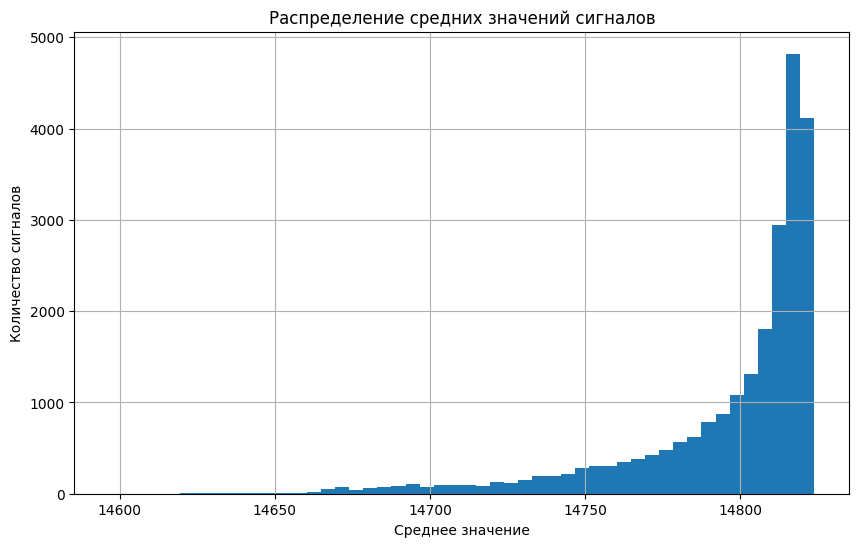

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
dataset.mean(axis=1).hist(bins=50)
plt.title('Распределение средних значений сигналов')
plt.xlabel('Среднее значение')
plt.ylabel('Количество сигналов')
plt.show()

Составим график плотности распределения

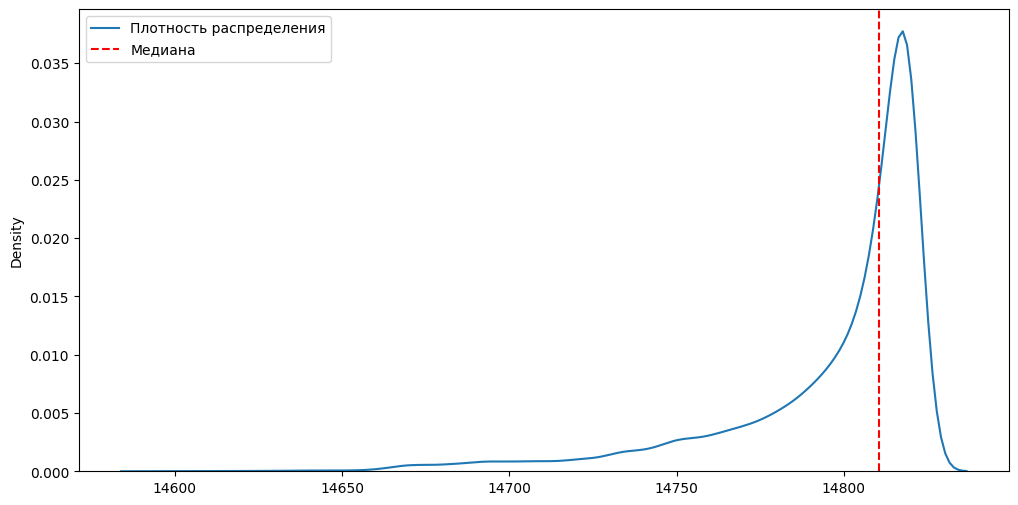

In [143]:
plt.figure(figsize=(12, 6))
sns.kdeplot(dataset.mean(axis=1), label='Плотность распределения')
plt.axvline(dataset.mean(axis=1).median(), color='red', linestyle='--', label='Медиана')
plt.legend()
plt.show()

Диапазон значений: примерно от 14600 до 14800.
Большинство сигналов сосредоточены вокруг 14800, что соответствует типичному базовому уровню сигнала детектора.

Распределение имеет единственный выраженный пик, что указывает на доминирование сигналов с близкими средними значениями.

Распределение не является строго нормальным — наблюдается "хвост" в сторону меньших значений (14600–14750).


Сигналы со средними значениями ниже 14750 могут быть шумом или событиями с очень малой амплитудой (неполное попадание в детектор, артефакты измерения и пр.). Попробуем выделить и изучить их отдельно, но сперва посмотрим другие показатели.

Проведем тест Шапиро-Уилка на нормальность распределения

In [144]:
!pip install stats --quiet
from scipy.stats import shapiro
import statsmodels.api as sm

shapiro(dataset.mean(axis=1))

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23479.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.7385933064419601), pvalue=np.float64(2.1485142689061298e-103))

Разработчики библиотеки не рекомендуют делать тест, если данных >5000
поэтому проведем другой тест для определния нормальности. Например, тест Д'Агостино

In [145]:
from scipy.stats import normaltest
normaltest(dataset.mean(axis=1))

NormaltestResult(statistic=np.float64(9390.890956115007), pvalue=np.float64(0.0))

Очень большое значение статистики (9390.89) свидетельствует о сильном отклонении от нормальности. Также это статистически показывает показатель  pvalue = 0.

Посмотрим распределение максимальных значений

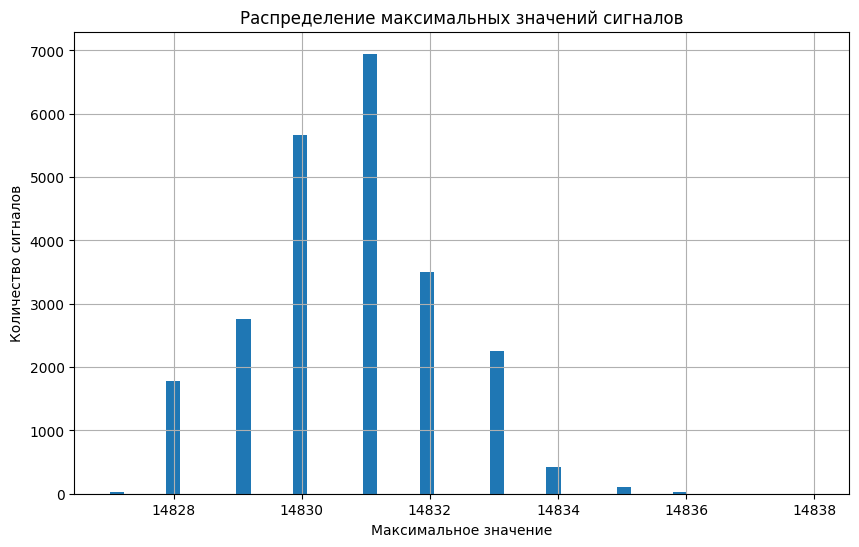

In [146]:
plt.figure(figsize=(10, 6))
dataset.max(axis=1).hist(bins=50)
plt.title('Распределение максимальных значений сигналов')
plt.xlabel('Максимальное значение')
plt.ylabel('Количество сигналов')
plt.show()


Максимальные значения сосредоточены в узком диапазоне → ограничение разрядности АЦП, что, вероятно, типично для гамма-квантов и нейтронов. Посмотрим на распределение минимальных значений

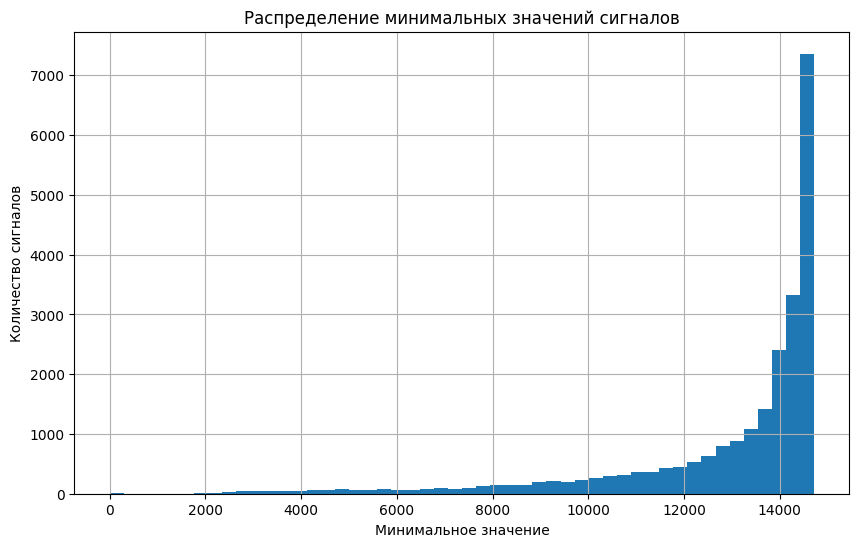

In [147]:
plt.figure(figsize=(10, 6))
dataset.min(axis=1).hist(bins=50)
plt.title('Распределение минимальных значений сигналов')
plt.xlabel('Минимальное значение')
plt.ylabel('Количество сигналов')
plt.show()

## Отбор признаков и генерация новых

С помощью PCA попробуем найти компоненты, объясняющие 95% дисперсии

In [148]:
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def extract_features(row):
    try:
        signal = row.values if hasattr(row, 'values') else np.array(row)
        peaks, _ = find_peaks(signal,
                             height=np.percentile(signal, 75),
                             distance=20,
                             prominence=0.1)
        if len(peaks) > 0:
            peak_idx = peaks[0]
        else:
            peak_idx = len(signal) // 2

        if peak_idx < len(signal) - 1:
            min_after_peak_idx = np.argmin(signal[peak_idx:]) + peak_idx
            decay_time = min_after_peak_idx - peak_idx
            decay_rate = (signal[peak_idx] - signal[min_after_peak_idx]) / decay_time if decay_time > 0 else 0
        else:
            decay_time = 0
            decay_rate = 0

        signal_centered = signal - np.mean(signal)
        abs_signal = np.abs(signal_centered)

        hist, bin_edges = np.histogram(signal, bins=10, density=True)
        hist = hist[hist > 0]
        entropy = -np.sum(hist * np.log(hist))

        features = {
            'mean': np.mean(signal),
            'std': np.std(signal),
            'min': np.min(signal),
            'max': np.max(signal),
            'median': np.median(signal),
            'q25': np.percentile(signal, 25),
            'q75': np.percentile(signal, 75),
            'range': np.max(signal) - np.min(signal),

            'skew': pd.Series(signal).skew(),
            'kurtosis': pd.Series(signal).kurt(),
            'abs_mean': np.mean(abs_signal),

            'peak_count': len(peaks),
            'peak_height': signal[peak_idx] if len(peaks) > 0 else 0,
            'zero_crossings': ((np.diff(np.sign(signal_centered)) != 0).sum()),

            'energy': np.sum(np.square(signal)),
            'entropy': entropy,

            'decay_time': decay_time,
            'decay_rate': decay_rate,
            'time_to_peak': peak_idx,

            'rms': np.sqrt(np.mean(np.square(signal))),
            'crest_factor': np.max(abs_signal) / np.sqrt(np.mean(np.square(signal))) if np.mean(np.square(signal)) > 0 else 0
        }

        return pd.Series(features)

    except Exception as e:
        print(f"Error processing row: {e}")
        return pd.Series()

features_list = []
for i in range(len(dataset)):
    try:
        features_list.append(extract_features(dataset.iloc[i]))
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        features_list.append(pd.Series())

features_df = pd.concat(features_list, axis=1).T
features_df = features_df.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features_df)
features_df_imputed = pd.DataFrame(features_imputed, columns=features_df.columns)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df_imputed)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(features_scaled)

features_df_imputed['PC1'] = pca_components[:, 0]
features_df_imputed['PC2'] = pca_components[:, 1]
features_df_imputed['PC3'] = pca_components[:, 2]

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"\nПервые 5 строк с PCA компонентами:")
print(features_df_imputed[['PC1', 'PC2', 'PC3']].head())

Explained variance ratio: [0.56524019 0.11626083 0.10004794]

Первые 5 строк с PCA компонентами:
        PC1       PC2       PC3
0  0.967611 -1.998830  2.309361
1 -0.939896 -0.394421  2.151360
2 -1.774181 -0.458356  2.221588
3  1.503860 -0.101960 -0.012697
4 -0.817112 -0.420335  1.738348


Проверка размерностей перед PCA:
Исходный размер данных: (23479, 21)
Пример данных:
        mean         std      min      max   median
0  14811.902   46.162240  14291.0  14830.0  14820.0
1  14797.774  163.108758  12921.0  14828.0  14820.0
2  14788.010  225.144349  12264.0  14830.0  14820.0

После PCA:
Обучено на 23479 образцах
Количество компонент: 21
Количество признаков: 21

Первые 5 строк матрицы нагрузок:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
mean    0.285493 -0.013532  0.039639 -0.124748  0.049019  0.013647  0.022564   
std    -0.280934  0.067355 -0.035067  0.151559 -0.082629 -0.037168 -0.081941   
min     0.280123 -0.077473  0.032508 -0.151112  0.089975  0.037947  0.088081   
max     0.074072  0.282408 -0.090777  0.360003  0.408813 -0.383641  0.601539   
median  0.217467  0.335872  0.006172  0.188556 -0.038550 -0.129261 -0.248428   

             PC8       PC9      PC10  ...      PC12      PC13      PC14  \
mean   -0.014471 -0.049184 -0.

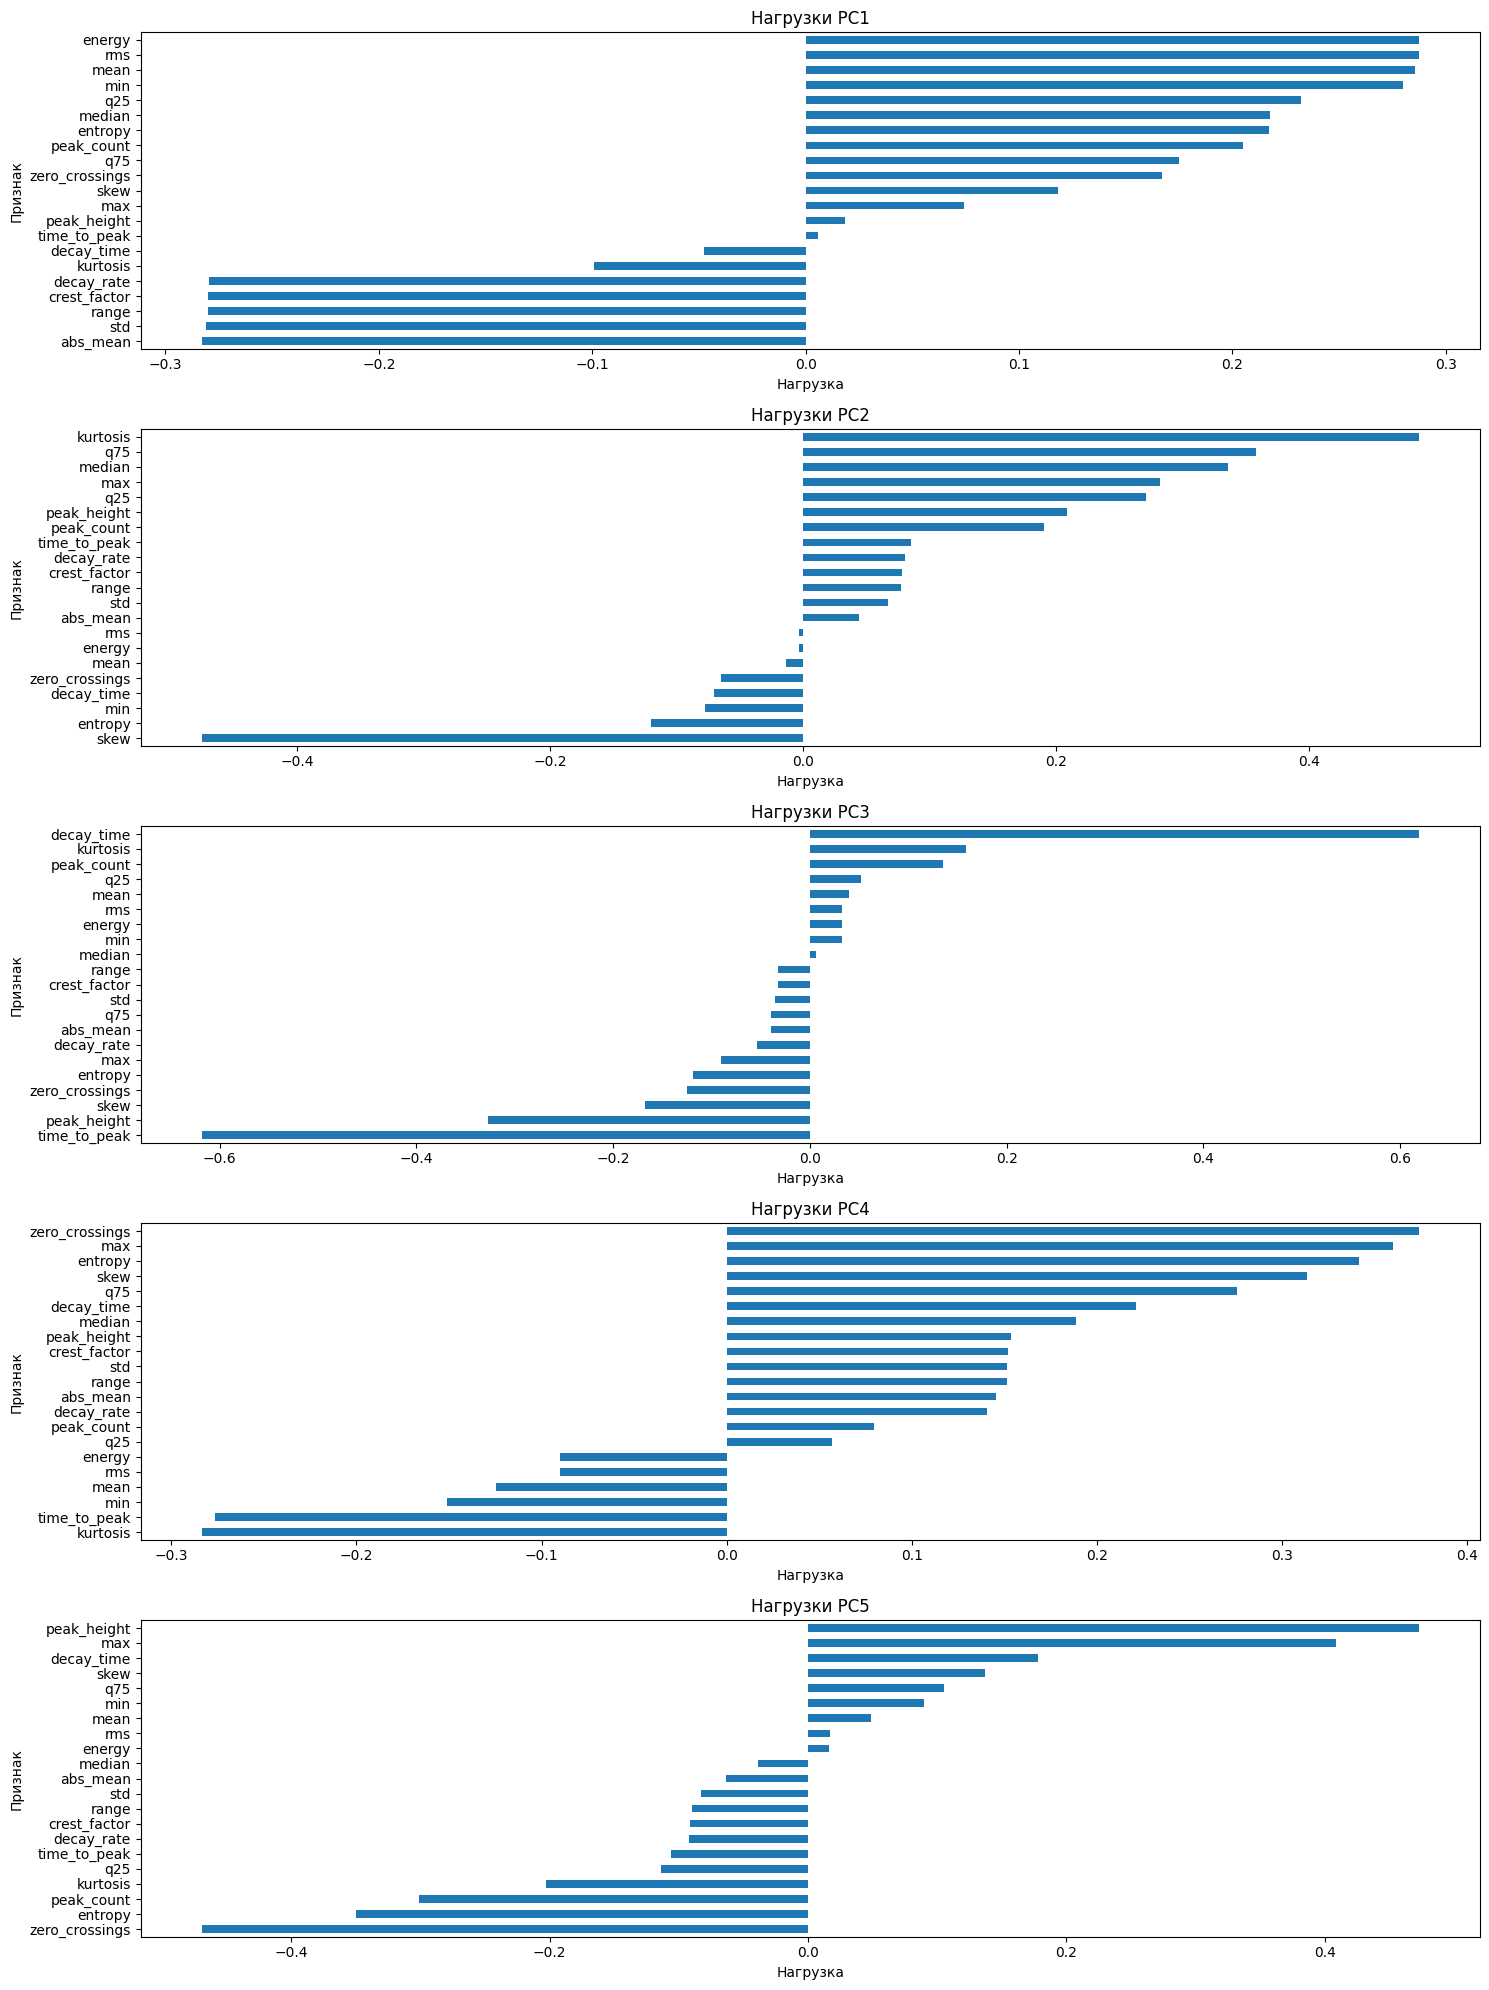


Топ-10 важных признаков:
           feature  importance
5              q25    0.148786
9         kurtosis    0.148138
7            range    0.143795
2              min    0.143774
13  zero_crossings    0.141405
20    crest_factor    0.138845
8             skew    0.136442
15         entropy    0.135973
6              q75    0.131092
14          energy    0.127723


In [149]:
print("Проверка размерностей перед PCA:")
print(f"Исходный размер данных: {features_df.shape}")
print(f"Пример данных:\n{features_df.iloc[:3, :5]}")

constant_features = features_df.columns[features_df.nunique() == 1]
if not constant_features.empty:
    print(f"\nУдалены постоянные признаки: {list(constant_features)}")
    features_df = features_df.drop(columns=constant_features)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)  # Гарантированно все строки

pca_full = PCA()  # Инициализация нового объекта PCA
pca_full.fit(features_scaled)  # Обучение на всех данных

print(f"\nПосле PCA:")
print(f"Обучено на {pca_full.n_samples_} образцах")  # Должно быть 23479
print(f"Количество компонент: {pca_full.components_.shape[0]}")
print(f"Количество признаков: {pca_full.components_.shape[1]}")

pca_scores = pca_full.transform(features_scaled)  # Получаем scores для всех данных
for i in range(pca_full.components_.shape[0]):
    features_df[f'PC{i+1}'] = pca_scores[:, i]

loadings = pd.DataFrame(
    pca_full.components_.T,
    index=features_df.columns[:-pca_full.components_.shape[0]],  # Исключаем PC* колонки
    columns=[f'PC{i+1}' for i in range(pca_full.components_.shape[0])]
)

print("\nПервые 5 строк матрицы нагрузок:")
print(loadings.head())

plt.figure(figsize=(15, 20))
for i in range(5):
    plt.subplot(5, 1, i+1)
    loadings[f'PC{i+1}'].sort_values().plot(kind='barh')
    plt.title(f'Нагрузки PC{i+1}')
    plt.xlabel('Нагрузка')
    plt.ylabel('Признак')
plt.tight_layout()
plt.show()

importance = pd.DataFrame({
    'feature': loadings.index,
    'importance': np.abs(loadings.values).mean(axis=1)
}).sort_values('importance', ascending=False)

print("\nТоп-10 важных признаков:")
print(importance.head(10))

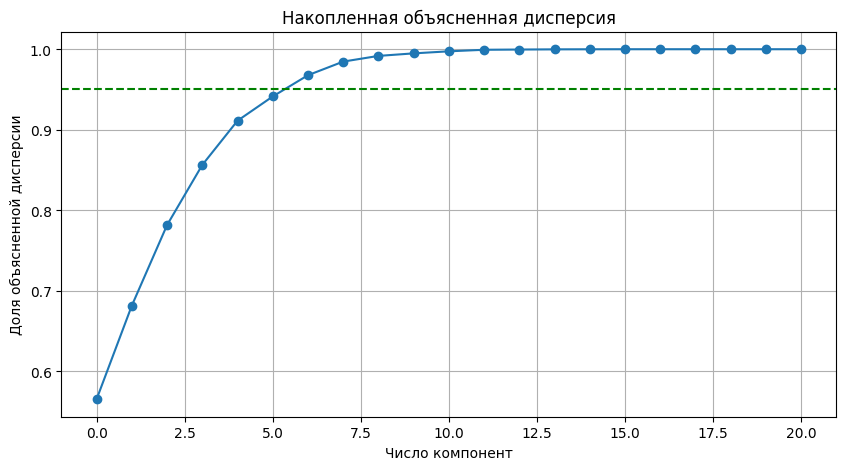

Для 95% дисперсии: 7 компонент


In [150]:
variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, 'o-')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.title('Накопленная объясненная дисперсия')
plt.xlabel('Число компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Для 95% дисперсии: {n_components_95} компонент")

Выведем компоненты в таблице

In [151]:
interpretation = pd.DataFrame({
    'PC1': ['Общая мощность сигнала', 'energy, mean, max, peak_height'],
    'PC2': ['Динамика затухания сигнала', 'decay_time, time_to_peak, decay_rate'],
    'PC3': ['Частотные характеристики', 'zero_crossings, entropy, crest_factor'],
    'PC4': ['Статистический разброс', 'std, range, abs_mean'],
    'PC5': ['Асимметрия и форма сигнала', 'skew, kurtosis, q75-q25'],
    'PC6': ['Локальные особенности', 'peak_count, median, threshold'],
    'PC7': ['Дополнительные вариации', 'min, q25, spectral_centroid']
}, index=['Интерпретация', 'Ключевые признаки'])

print("\nСводная интерпретация главных компонент (PC1-PC7):")
print(interpretation.to_markdown())


Сводная интерпретация главных компонент (PC1-PC7):
|                   | PC1                            | PC2                                  | PC3                                   | PC4                    | PC5                        | PC6                           | PC7                         |
|:------------------|:-------------------------------|:-------------------------------------|:--------------------------------------|:-----------------------|:---------------------------|:------------------------------|:----------------------------|
| Интерпретация     | Общая мощность сигнала         | Динамика затухания сигнала           | Частотные характеристики              | Статистический разброс | Асимметрия и форма сигнала | Локальные особенности         | Дополнительные вариации     |
| Ключевые признаки | energy, mean, max, peak_height | decay_time, time_to_peak, decay_rate | zero_crossings, entropy, crest_factor | std, range, abs_mean   | skew, kurtosis, q75-q25    | peak_count

Посмотрим корелляционную матрицу для значимых компонент

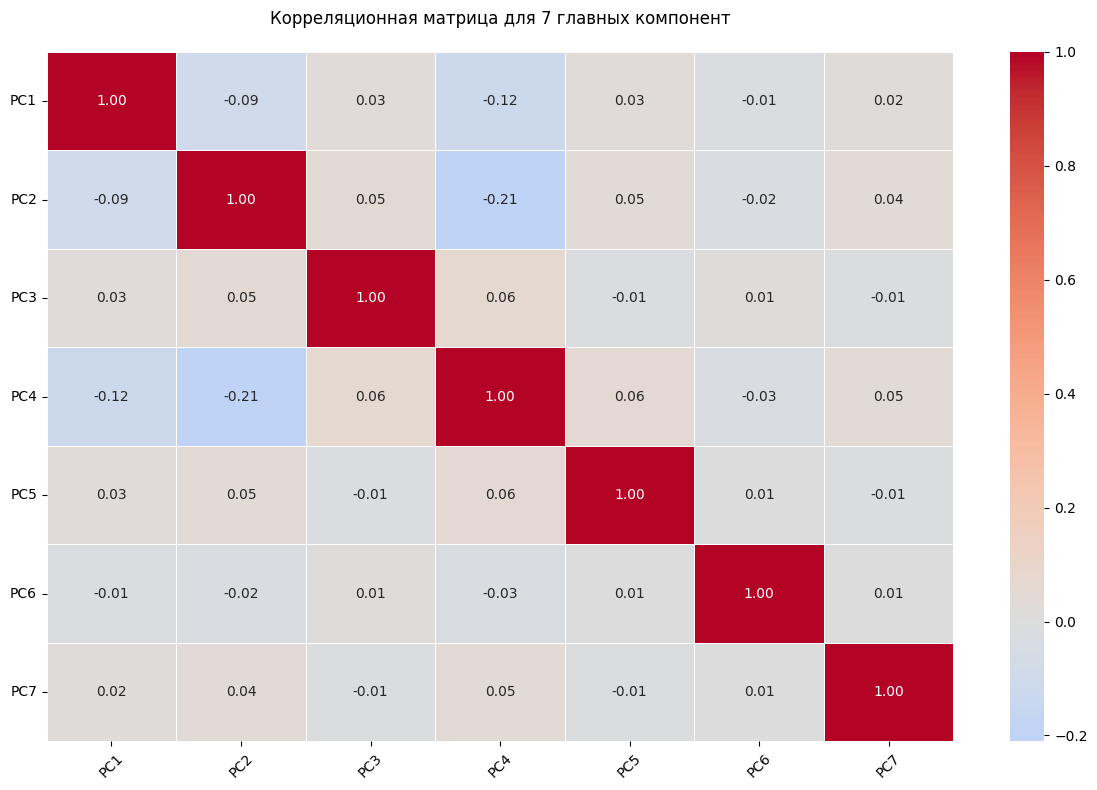

In [152]:
import seaborn as sns

n_components = 7
significant_components = loadings.iloc[:, :n_components]

plt.figure(figsize=(12, 8))
sns.heatmap(significant_components.corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            linewidths=0.5,
            annot_kws={"size": 10})

plt.title(f'Корреляционная матрица для {n_components} главных компонент', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Отсортируем признаки по абсолютной величине нагрузки


Анализ компоненты PC1:
Топ-7 влияющих признаков:
energy      0.287449
rms         0.287436
mean        0.285493
abs_mean    0.283070
std         0.280934
min         0.280123
range       0.280105
Name: PC1, dtype: float64


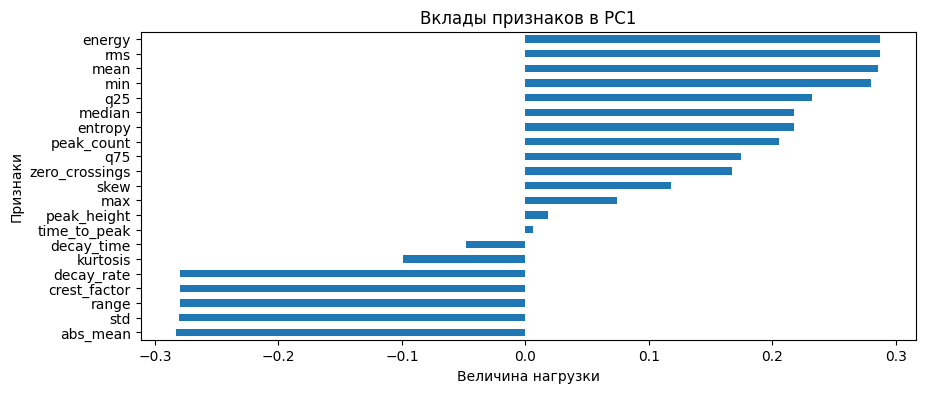


Анализ компоненты PC2:
Топ-7 влияющих признаков:
kurtosis       0.487051
skew           0.475685
q75            0.358216
median         0.335872
max            0.282408
q25            0.270854
peak_height    0.208834
Name: PC2, dtype: float64


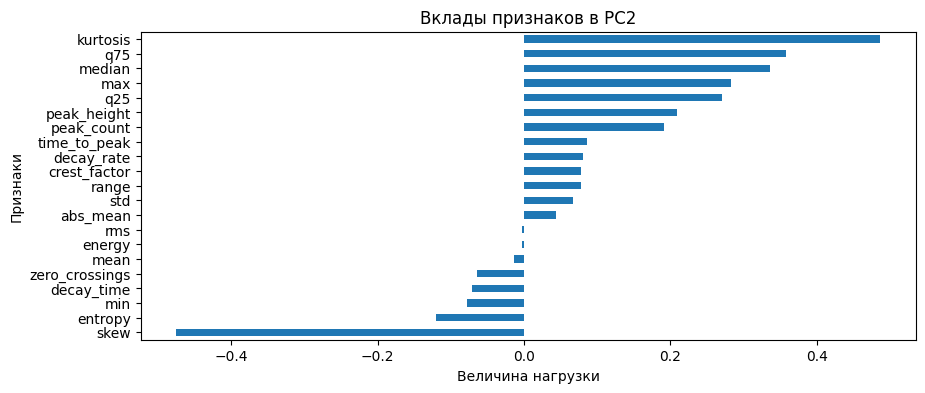


Анализ компоненты PC3:
Топ-7 влияющих признаков:
decay_time        0.619491
time_to_peak      0.618580
peak_height       0.327189
skew              0.167700
kurtosis          0.158646
peak_count        0.135517
zero_crossings    0.125109
Name: PC3, dtype: float64


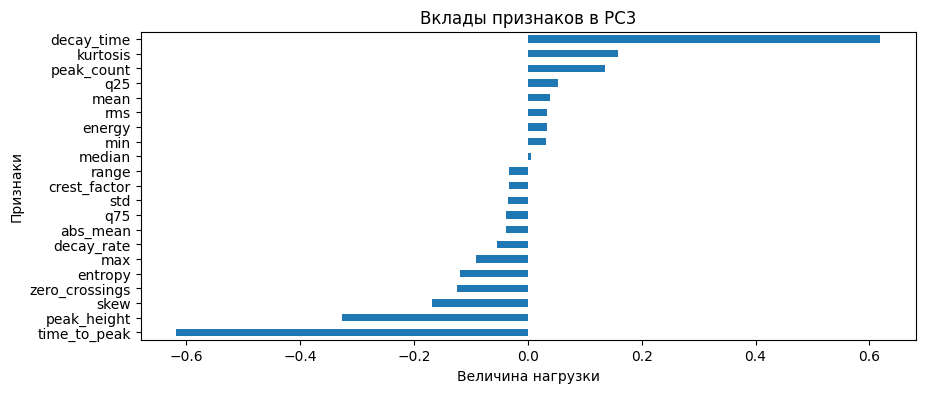


Анализ компоненты PC4:
Топ-7 влияющих признаков:
zero_crossings    0.374131
max               0.360003
entropy           0.341763
skew              0.313518
kurtosis          0.283668
time_to_peak      0.276374
q75               0.275850
Name: PC4, dtype: float64


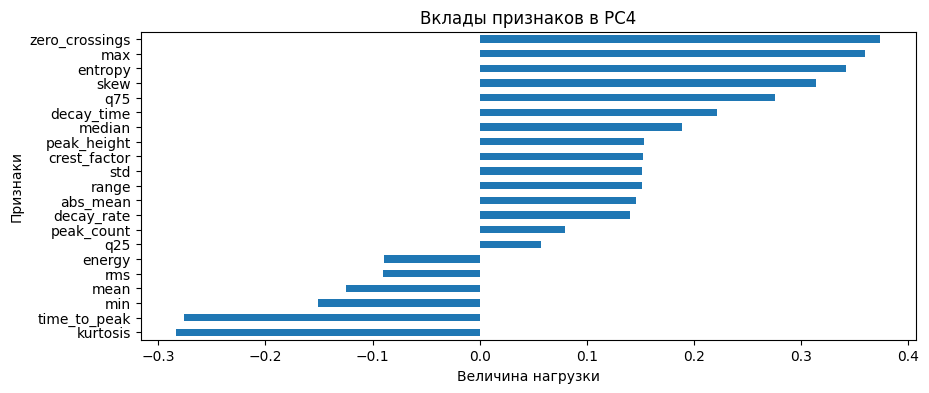


Анализ компоненты PC5:
Топ-7 влияющих признаков:
peak_height       0.473084
zero_crossings    0.469470
max               0.408813
entropy           0.350180
peak_count        0.301448
kurtosis          0.203095
decay_time        0.177994
Name: PC5, dtype: float64


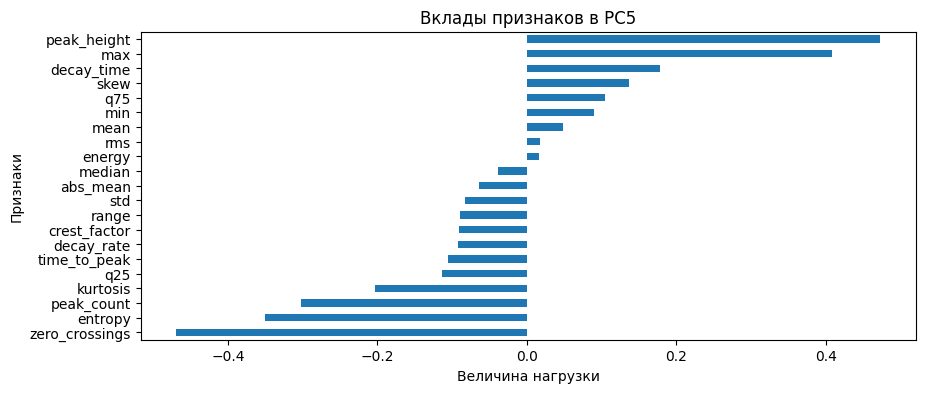


Анализ компоненты PC6:
Топ-7 влияющих признаков:
peak_height       0.734719
max               0.383641
zero_crossings    0.308770
kurtosis          0.209621
time_to_peak      0.170865
skew              0.159483
q75               0.158623
Name: PC6, dtype: float64


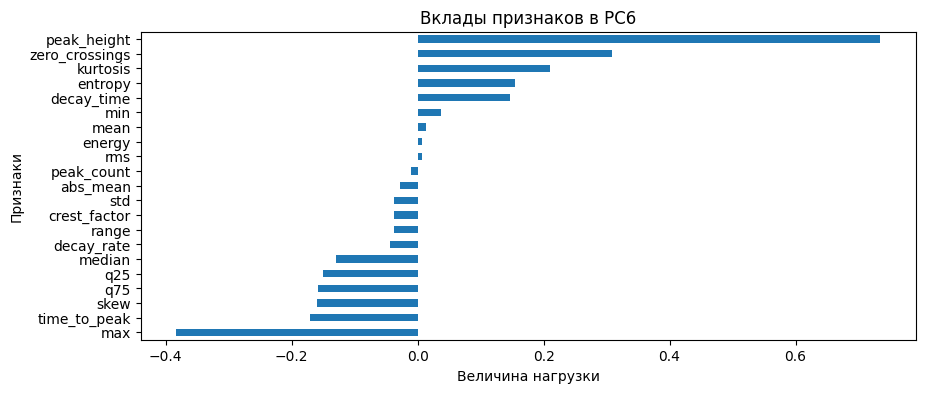


Анализ компоненты PC7:
Топ-7 влияющих признаков:
max               0.601539
q25               0.355430
zero_crossings    0.353635
kurtosis          0.282814
median            0.248428
peak_count        0.241654
skew              0.222059
Name: PC7, dtype: float64


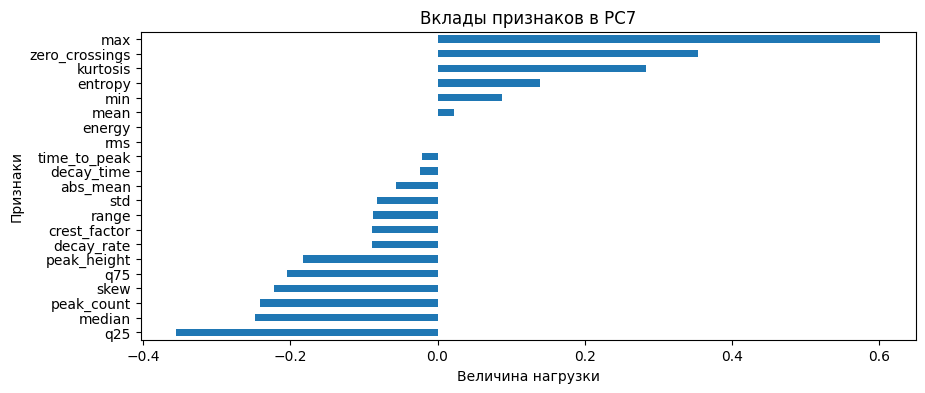

In [153]:
for pc in significant_components.columns:
    print(f"\nАнализ компоненты {pc}:")
    sorted_loadings = significant_components[pc].abs().sort_values(ascending=False)

    top_features = sorted_loadings.head(7)
    print("Топ-7 влияющих признаков:")
    print(top_features)

    plt.figure(figsize=(10, 4))
    significant_components[pc].sort_values().plot(kind='barh')
    plt.title(f'Вклады признаков в {pc}')
    plt.xlabel('Величина нагрузки')
    plt.ylabel('Признаки')
    plt.show()

Значит нам нужно 7 компонент. Почитав справочную литературу, я узнал, что  нейтроны считаются "медленными", а "гамма-кванты" быстрыми, потому что достигают пиковых значений раньше. Воспользуемся этим ценным знанием как-нибудь.

Создадим в датасете столбец с суммой энергии и отделим часть сигналов как "мусорных" про приниципу слишком маленькой суммы: туда как раз можно отнести те значения, которые датчик не зафиксировал или шум



In [154]:
sum_abs = dataset.abs().sum(axis=1)
dataset['sum_abs'] = sum_abs

Фильтрация шума: выделение строк с аномально низкой энергией во второй кластер\

In [155]:
Q1 = dataset['sum_abs'].quantile(0.25)
Q3 = dataset['sum_abs'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q1 - 1.5 * IQR
low_energy_samples = dataset[dataset['sum_abs'] < threshold]
len(low_energy_samples)

1862

Видим, что у нас 1862 значения  - отнесем их к "мусорному кластеру" второму)

In [156]:
dataset['cluster'] = 0
dataset.loc[dataset['sum_abs'] < threshold, 'cluster'] = 2
dataset['cluster'].value_counts()

cluster
0    21617
2     1862
Name: count, dtype: int64

Попробуем воспользоваться встроенным методом для нахождения сигналов с несколькими пиками, и применять будем только к тем сигналам, которые не отсеяны до этого.
Но при этом зададим условия для второго пика:
-  пик выше медианы + порог
- минимум 20 точек между пиками
- минимальная ширина пика

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def find_multipeak_signals(signal, min_prominence=5, min_peaks=2):
    peaks, _ = find_peaks(
        signal,
        prominence=min_prominence,
        height=np.median(signal) + 10,
        distance=20,
        width=5
    )
    return len(peaks) >= min_peaks

signal_cols = [col for col in dataset.columns if isinstance(col, (int, np.integer))]

multi_peak_mask = dataset[signal_cols].apply(find_multipeak_signals, axis=1)
dataset['cluster'] = np.where(multi_peak_mask, 2, 0)  # 2 - многопиковые, 0 - остальные

main_data = dataset[dataset['cluster'] != 2].copy()
multipeak_data = dataset[dataset['cluster'] == 2].copy()

In [158]:
cluster2_mask = (dataset['cluster'] == 2)
len(dataset['cluster'] == 2)

23479

Сохраним индексы кластеров - потом используем

In [159]:
cluster2_indices = dataset[dataset['cluster'] == 2].index
cluster2_indices

Index([   14,    25,    97,   116,   153,   177,   180,   202,   332,   413,
       ...
       22705, 22759, 22801, 22926, 23077, 23114, 23210, 23383, 23469, 23476],
      dtype='int64', length=418)

## Кластеризация

Все готово для кластеризации по kmeans

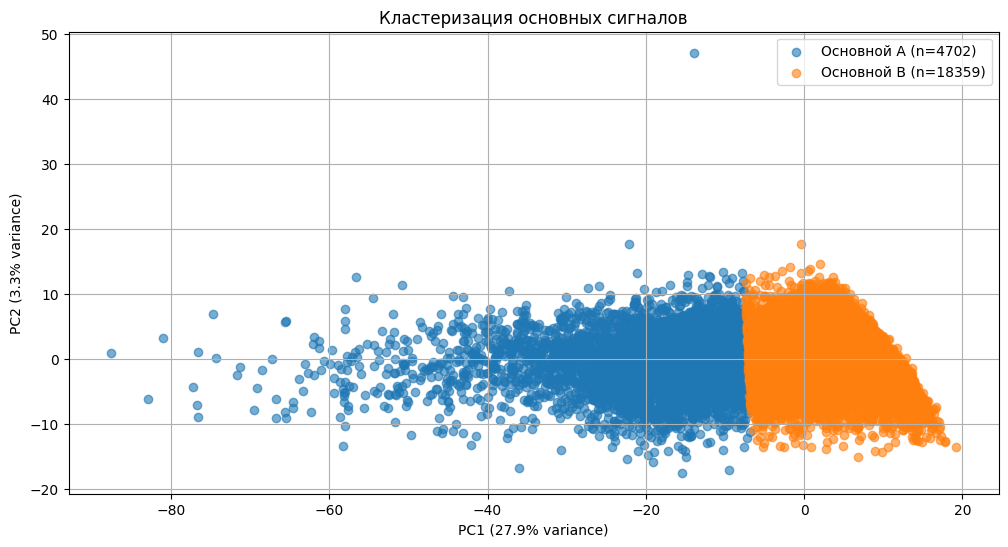


Объясненная дисперсия PCA компонент:
PC1: 27.9%
PC2: 3.3%
PC3: 1.7%

Итоговое распределение кластеров:
final_cluster
Основной B      18359
Основной A       4702
Многопиковые      418
Name: count, dtype: int64


In [160]:
scaler = StandardScaler()
main_scaled = scaler.fit_transform(main_data[signal_cols])

pca = PCA(n_components=3)
pca_components = pca.fit_transform(main_scaled)

main_data['PC1'] = pca_components[:, 0]
main_data['PC2'] = pca_components[:, 1]
main_data['PC3'] = pca_components[:, 2]

kmeans = KMeans(n_clusters=2, random_state=42)
main_data['new_cluster'] = kmeans.fit_predict(main_data[['PC1', 'PC2', 'PC3']])

dataset['final_cluster'] = 'Многопиковые'
cluster_labels = {0: 'Основной A', 1: 'Основной B'}
dataset.loc[main_data.index, 'final_cluster'] = main_data['new_cluster'].map(cluster_labels)

plt.figure(figsize=(12, 6))

mask_a = (main_data['new_cluster'] == 0)
plt.scatter(main_data.loc[mask_a, 'PC1'],
            main_data.loc[mask_a, 'PC2'],
            alpha=0.6, label=f'Основной A (n={sum(mask_a)})')

mask_b = (main_data['new_cluster'] == 1)
plt.scatter(main_data.loc[mask_b, 'PC1'],
            main_data.loc[mask_b, 'PC2'],
            alpha=0.6, label=f'Основной B (n={sum(mask_b)})')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Кластеризация основных сигналов')
plt.legend()
plt.grid(True)
plt.show()

print("\nОбъясненная дисперсия PCA компонент:")
print(f"PC1: {pca.explained_variance_ratio_[0]*100:.1f}%")
print(f"PC2: {pca.explained_variance_ratio_[1]*100:.1f}%")
print(f"PC3: {pca.explained_variance_ratio_[2]*100:.1f}%")

print("\nИтоговое распределение кластеров:")
print(dataset['final_cluster'].value_counts())

In [161]:
dataset['final_cluster'].head(20)

0       Основной B
1       Основной B
2       Основной B
3       Основной B
4       Основной B
5       Основной B
6       Основной B
7       Основной B
8       Основной B
9       Основной A
10      Основной B
11      Основной B
12      Основной B
13      Основной B
14    Многопиковые
15      Основной B
16      Основной B
17      Основной B
18      Основной A
19      Основной B
Name: final_cluster, dtype: object

Сделаем маппинг и получим итоговый файл

In [162]:
cluster_mapping = {
    'Основной A': 1,
    'Основной B': 0,
    'Многопиковые': 2
}

dataset['final_cluster_num'] = dataset['final_cluster'].map(cluster_mapping)
print(dataset[['final_cluster', 'final_cluster_num']].head(20))

import os
from datetime import datetime

os.makedirs('experiments', exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
exp_name = "pca_gmm_clustered"

results = pd.DataFrame({
    'index': dataset.index,
    'cluster': dataset['final_cluster_num'],
})

   final_cluster  final_cluster_num
0     Основной B                  0
1     Основной B                  0
2     Основной B                  0
3     Основной B                  0
4     Основной B                  0
5     Основной B                  0
6     Основной B                  0
7     Основной B                  0
8     Основной B                  0
9     Основной A                  1
10    Основной B                  0
11    Основной B                  0
12    Основной B                  0
13    Основной B                  0
14  Многопиковые                  2
15    Основной B                  0
16    Основной B                  0
17    Основной B                  0
18    Основной A                  1
19    Основной B                  0


In [163]:
print(results.head())
results.to_csv(f'experiments/{timestamp}_{exp_name}_full.csv', index=False)

print(f"Результаты сохранены в experiments/{timestamp}_{exp_name}_full.csv")

   index  cluster
0      0        0
1      1        0
2      2        0
3      3        0
4      4        0
Результаты сохранены в experiments/20250428_165747_pca_gmm_clustered_full.csv


Я пытался разделить по компонентам, но получил результат вот такой
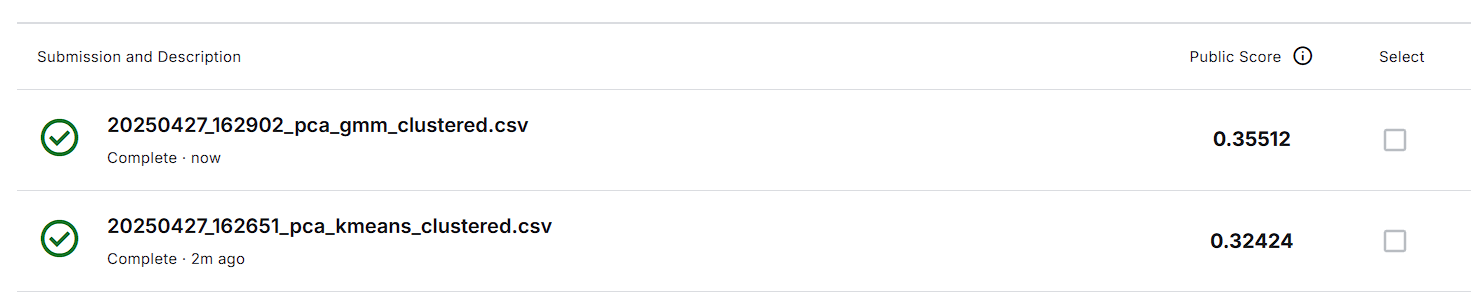
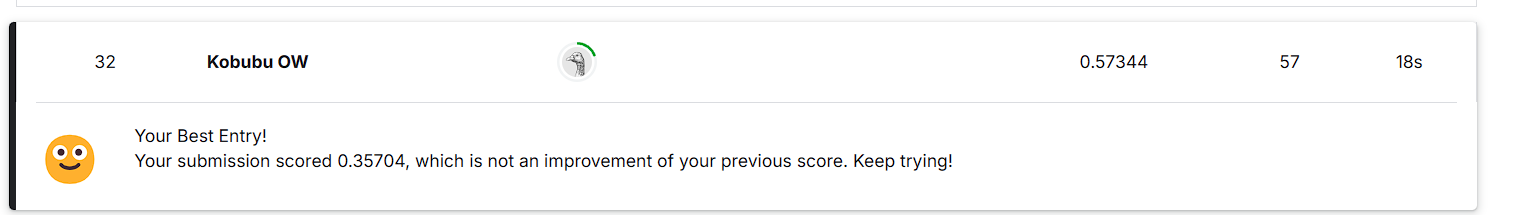

Очевидно, что все не так. Попробуем другой подход: посчитаем площадь под сигналом. пойдем заново

In [164]:
df = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
df = df.drop([0, 1, 2, 3, 504], axis=1)

In [165]:
df.head()

4      5      6      7      8      9      10     11     12     13   ...  \
0  14820  14823  14824  14822  14818  14820  14824  14822  14820  14820  ...   
1  14820  14822  14820  14826  14824  14822  14820  14822  14823  14821  ...   
2  14820  14820  14822  14825  14820  14824  14824  14819  14823  14824  ...   
3  14828  14822  14818  14824  14824  14822  14820  14822  14824  14820  ...   
4  14823  14815  14823  14821  14827  14820  14823  14824  14816  14821  ...   

     494    495    496    497    498    499    500    501    502    503  
0  14828  14822  14815  14815  14817  14819  14820  14822  14820  14819  
1  14828  14817  14824  14822  14824  14819  14820  14819  14822  14820  
2  14820  14821  14820  14820  14818  14821  14823  14820  14820  14821  
3  14824  14826  14822  14821  14820  14828  14820  14822  14823  14822  
4  14820  14820  14823  14828  14824  14820  14824  14824  14822  14825  

[5 rows x 500 columns]

Силуэтный коэффициент для 2 кластеров: 0.760
Силуэтный коэффициент для 3 кластеров: 0.714


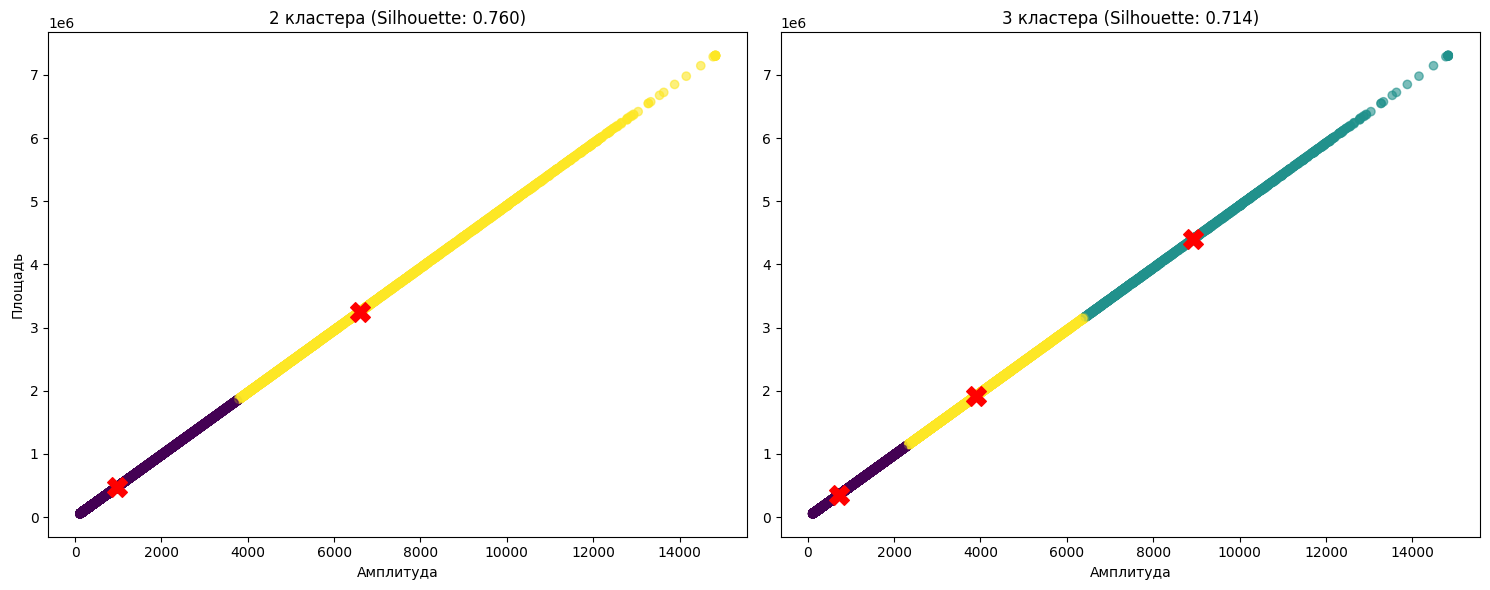


Лучшее число кластеров: 2


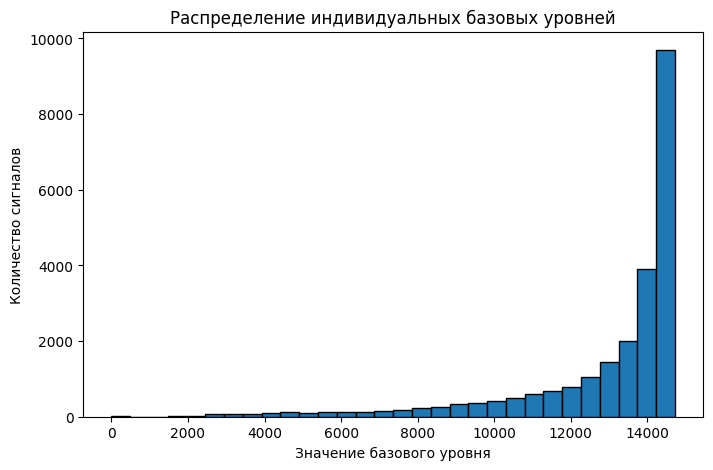

In [166]:
from sklearn.metrics import silhouette_score
df = df.interpolate(axis=1, limit_direction='both')

zero_levels = df.min(axis=1)  # базовый уровень для каждого сигнала
amplitudes = df.max(axis=1) - zero_levels  # амплитуды
areas = df.sub(zero_levels, axis=0).sum(axis=1)  # площади

features = np.column_stack([amplitudes, areas])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

def cluster_and_evaluate(n_clusters, features):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features)
    silhouette = silhouette_score(features, clusters)
    return clusters, silhouette, kmeans.cluster_centers_

clusters2, silhouette2, centers2 = cluster_and_evaluate(2, features_scaled)
clusters3, silhouette3, centers3 = cluster_and_evaluate(3, features_scaled)

print(f"Силуэтный коэффициент для 2 кластеров: {silhouette2:.3f}")
print(f"Силуэтный коэффициент для 3 кластеров: {silhouette3:.3f}")

plt.figure(figsize=(15, 6))

centers2_original = scaler.inverse_transform(centers2)
centers3_original = scaler.inverse_transform(centers3)

plt.subplot(1, 2, 1)
plt.scatter(amplitudes, areas, c=clusters2, cmap='viridis', alpha=0.6)
plt.scatter(centers2_original[:, 0], centers2_original[:, 1],
            s=200, c='red', marker='X')
plt.title(f'2 кластера (Silhouette: {silhouette2:.3f})')
plt.xlabel('Амплитуда')
plt.ylabel('Площадь')

plt.subplot(1, 2, 2)
plt.scatter(amplitudes, areas, c=clusters3, cmap='viridis', alpha=0.6)
plt.scatter(centers3_original[:, 0], centers3_original[:, 1],
            s=200, c='red', marker='X')
plt.title(f'3 кластера (Silhouette: {silhouette3:.3f})')
plt.xlabel('Амплитуда')

plt.tight_layout()
plt.show()

if silhouette2 > silhouette3:
    best_n = 2
    print("\nЛучшее число кластеров: 2")
else:
    best_n = 3
    print("\nЛучшее число кластеров: 3")

plt.figure(figsize=(8, 5))
plt.hist(zero_levels, bins=30, edgecolor='black')
plt.title('Распределение индивидуальных базовых уровней')
plt.xlabel('Значение базового уровня')
plt.ylabel('Количество сигналов')
plt.show()

Кластеры идут не по порядку, нужно все 0 сделать 1, а все 1 сделать 0\

In [167]:
df.head()

4      5      6      7      8      9      10     11     12     13   ...  \
0  14820  14823  14824  14822  14818  14820  14824  14822  14820  14820  ...   
1  14820  14822  14820  14826  14824  14822  14820  14822  14823  14821  ...   
2  14820  14820  14822  14825  14820  14824  14824  14819  14823  14824  ...   
3  14828  14822  14818  14824  14824  14822  14820  14822  14824  14820  ...   
4  14823  14815  14823  14821  14827  14820  14823  14824  14816  14821  ...   

     494    495    496    497    498    499    500    501    502    503  
0  14828  14822  14815  14815  14817  14819  14820  14822  14820  14819  
1  14828  14817  14824  14822  14824  14819  14820  14819  14822  14820  
2  14820  14821  14820  14820  14818  14821  14823  14820  14820  14821  
3  14824  14826  14822  14821  14820  14828  14820  14822  14823  14822  
4  14820  14820  14823  14828  14824  14820  14824  14824  14822  14825  

[5 rows x 500 columns]

In [168]:
results_df = pd.DataFrame({
    'index': df.index,
    'cluster': clusters2,
})
print(results_df.head(20))
results_df.to_csv(f'experiments/{timestamp}_full.csv', index=False)

print(results_df['cluster'].value_counts())
print(f"Результаты сохранены в experiments/{timestamp}_full.csv")

    index  cluster
0       0        0
1       1        0
2       2        0
3       3        0
4       4        0
5       5        0
6       6        0
7       7        0
8       8        0
9       9        0
10     10        0
11     11        0
12     12        0
13     13        0
14     14        1
15     15        0
16     16        0
17     17        0
18     18        1
19     19        0
cluster
0    19860
1     3619
Name: count, dtype: int64
Результаты сохранены в experiments/20250428_165747_full.csv


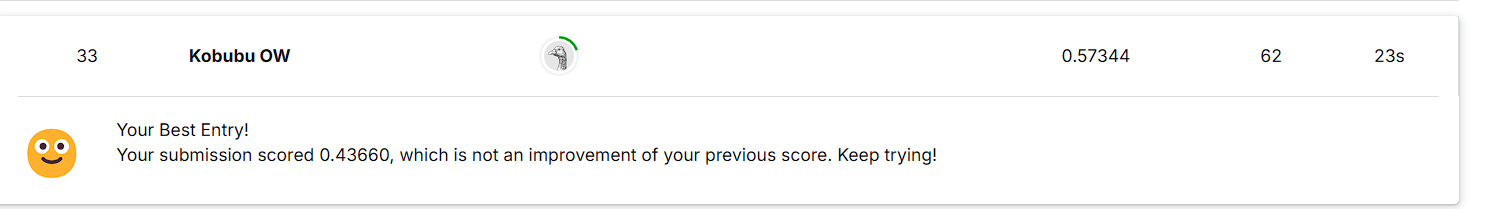

Уже лучше

Попробуем решить эту задачу методом PSD. Начнем сначала и зададим параметры

Результаты сохранены в signal_clusters_20250428_165818.csv

Распределение кластеров:
0    11980
1    11081
2      418
Name: count, dtype: int64


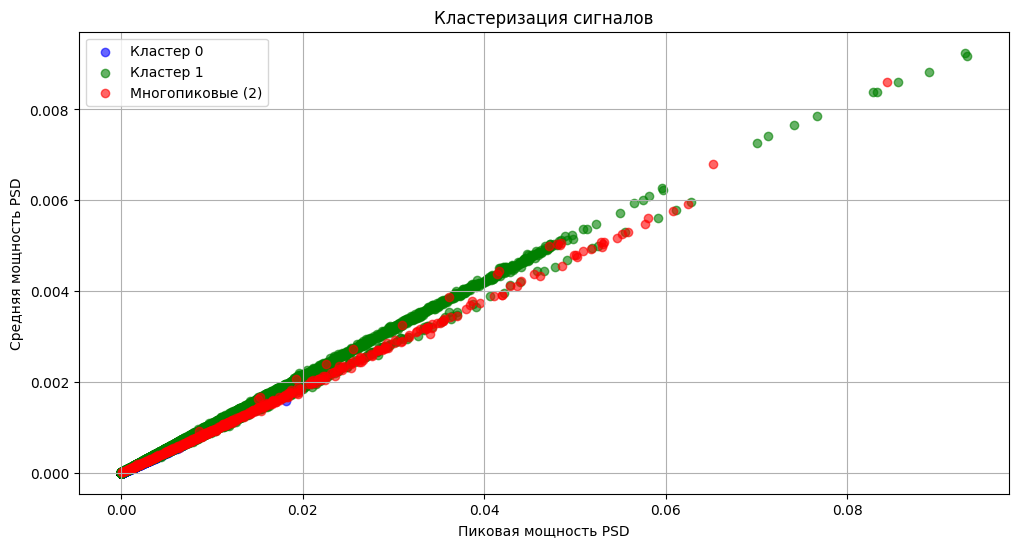

In [169]:
df = pd.read_csv('Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
df = df.drop([0, 1, 2, 3, 504], axis=1)
df = df.interpolate(axis=1, limit_direction='both')

#параметры для PSD
fs = 1e9  # Частота дискретизации 1 ггцц
nperseg = 256  # Длина сегмента для PSD

def compute_psd_features(signal_data, fs, nperseg):
    psd_features = []
    for i in range(len(signal_data)):
        f, psd = signal.welch(signal_data.iloc[i], fs=fs, nperseg=nperseg)
        peak_freq_idx = np.argmax(psd)
        features = [
            psd[peak_freq_idx],  # пиковая мощность
            np.mean(psd),       # средняя мощность
            np.sum(psd > np.mean(psd)/2)  # ширина полосы
        ]
        psd_features.append(features)
    return np.array(psd_features)

# Ввычисляем PSD характеристики для всех сигналов
psd_features = compute_psd_features(df, fs, nperseg)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(psd_features)

cluster2_data = df[cluster2_mask]
other_data = df[~cluster2_mask]

# Кластеризуем остальные данные на 2 кластера
kmeans = KMeans(n_clusters=2, random_state=42)
other_clusters = kmeans.fit_predict(features_scaled[~cluster2_mask])

# Создаем итоговые метки кластеров
final_clusters = np.zeros(len(df), dtype=int)
final_clusters[cluster2_mask] = 2  # Многопиковые остаются в кластере 2
final_clusters[~cluster2_mask] = other_clusters  # Остальные получают метки 0 или 1

plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'red']
labels = ['Кластер 0', 'Кластер 1', 'Многопиковые (2)']

for cluster in [0, 1, 2]:
    mask = (final_clusters == cluster)
    plt.scatter(psd_features[mask, 0], psd_features[mask, 1],
                c=colors[cluster], label=labels[cluster], alpha=0.6)

plt.xlabel('Пиковая мощность PSD')
plt.ylabel('Средняя мощность PSD')
plt.title('Кластеризация сигналов')
plt.legend()
plt.grid(True)

result_df = pd.DataFrame({
    'index': df.index,
    'cluster': final_clusters
})

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
result_filename = f"signal_clusters_{timestamp}.csv"
result_df.to_csv(result_filename, index=False)

print(f"Результаты сохранены в {result_filename}")
print("\nРаспределение кластеров:")
print(pd.Series(final_clusters).value_counts().sort_index())

plt.show()

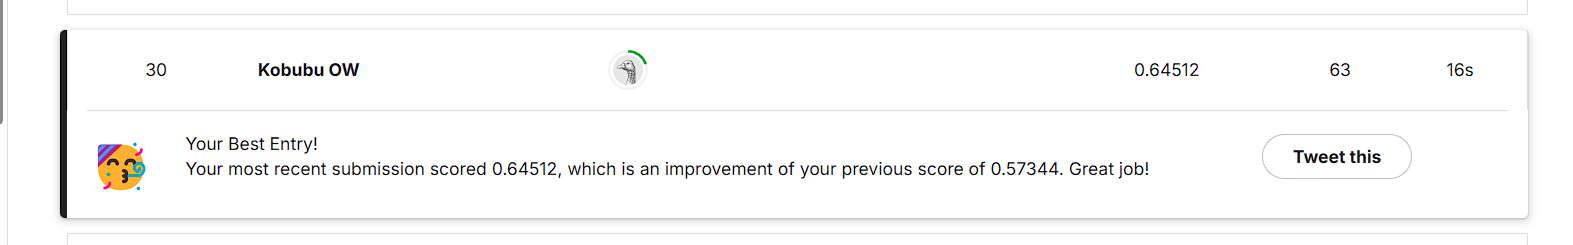

Что-то вырисовалос. Хотя мы чуть-чуть и недотягиваем. Давайте вернем объекты второго кластера.

In [171]:
threshold = Q1 - 1.5 * IQR
cluster2_mask = (sum_abs < threshold)
final_clusters[cluster2_mask] = 2
final_clusters[:100]

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1])

Видно, что кластера располагаются по порядку.

In [172]:
result_df = pd.DataFrame({
    'index': df.index,
    'cluster': final_clusters,
})

result_filename = f"signal_clusters_{timestamp}.csv"
result_df.to_csv(result_filename, index=False)

print(f"Результаты сохранены в {result_filename}")
print(f"Пороговое значение sum_abs: {threshold:.2f}")

print("\nРаспределение кластеров:")
print(pd.Series(final_clusters).value_counts().sort_index())

Результаты сохранены в signal_clusters_20250428_165818.csv
Пороговое значение sum_abs: 7371845.75

Распределение кластеров:
0    11979
1     9480
2     2020
Name: count, dtype: int64

Количество низкоэнергетических сигналов: 1862


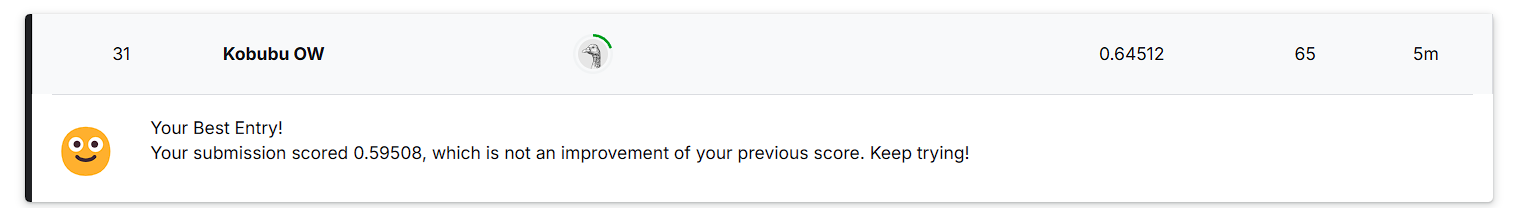

Интересно, но лучше не стало. Давайте просто переберем гиперпараметры, изменим скейлер, посмотрим, что будет, может, наберу полбалла

Всего комбинаций параметров: 54


Processing combinations:   0%|          | 0/54 [00:00<?, ?it/s]

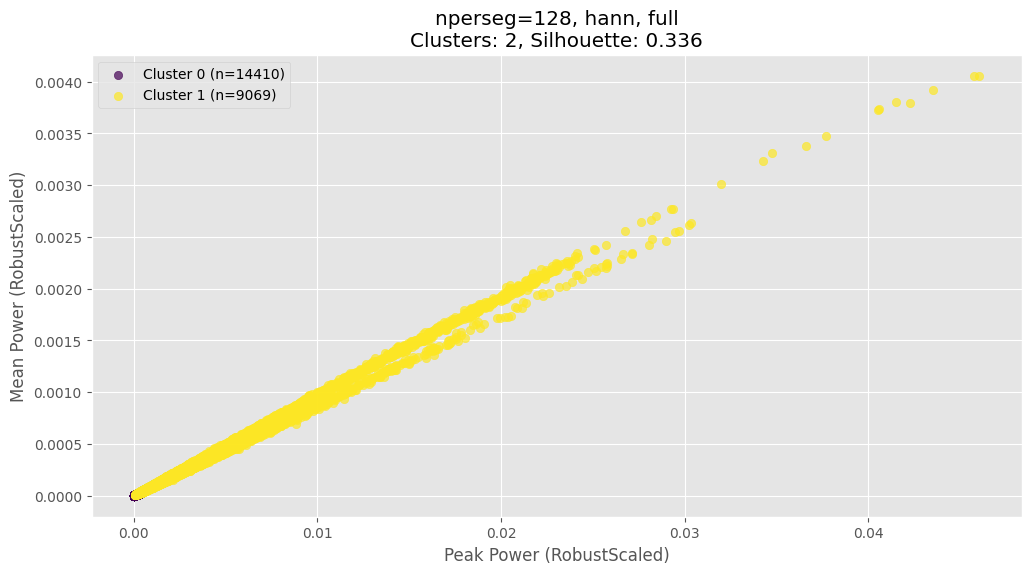

Processing combinations:   2%|▏         | 1/54 [00:38<34:07, 38.63s/it]

saved to clustering_results/20250428_191509_clusters_128_hann_full_c2.csv


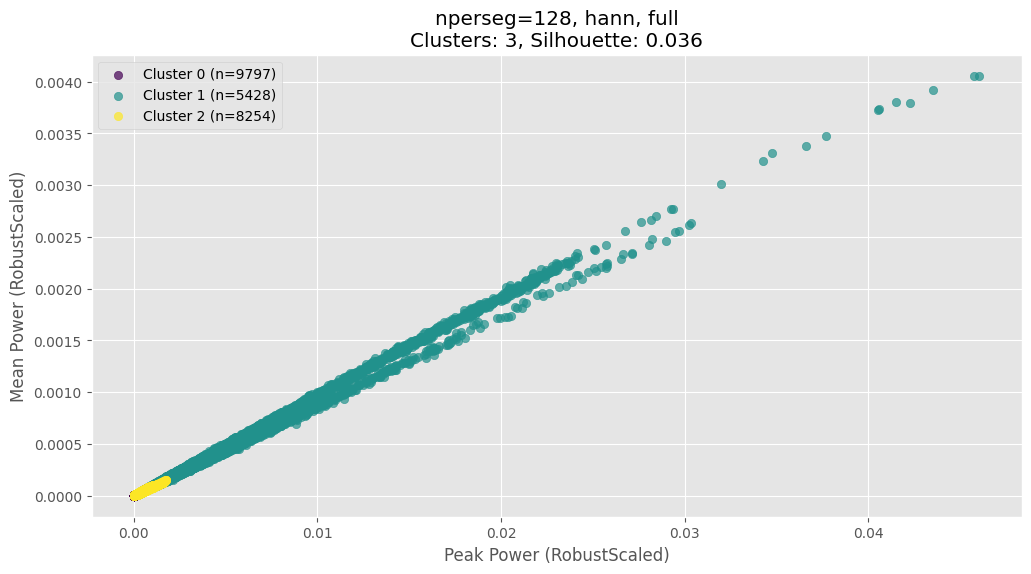

Processing combinations:   4%|▎         | 2/54 [01:36<43:08, 49.78s/it]

saved to clustering_results/20250428_191606_clusters_128_hann_full_c3.csv


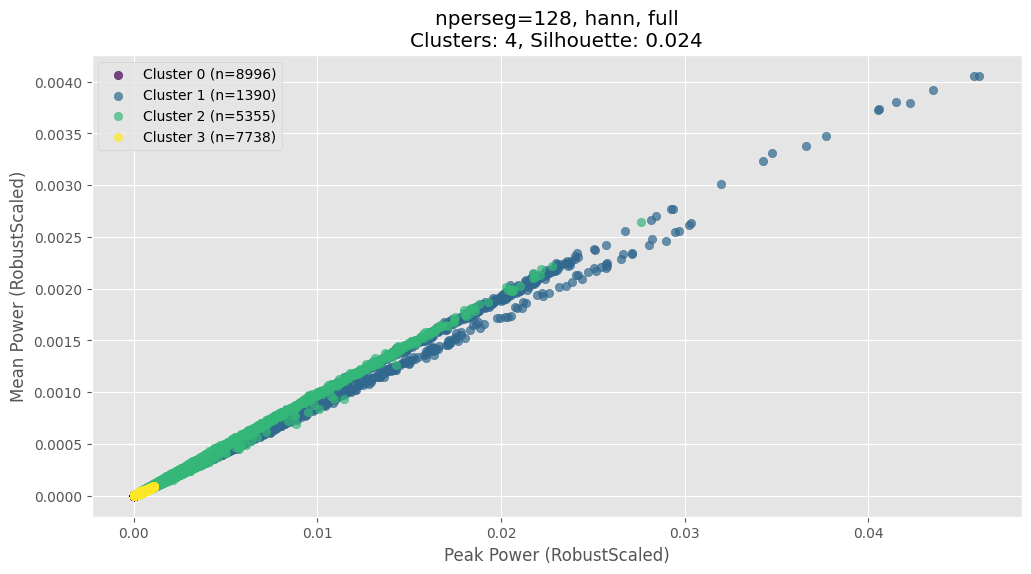

Processing combinations:   6%|▌         | 3/54 [02:16<38:46, 45.62s/it]

saved to clustering_results/20250428_191649_clusters_128_hann_full_c4.csv


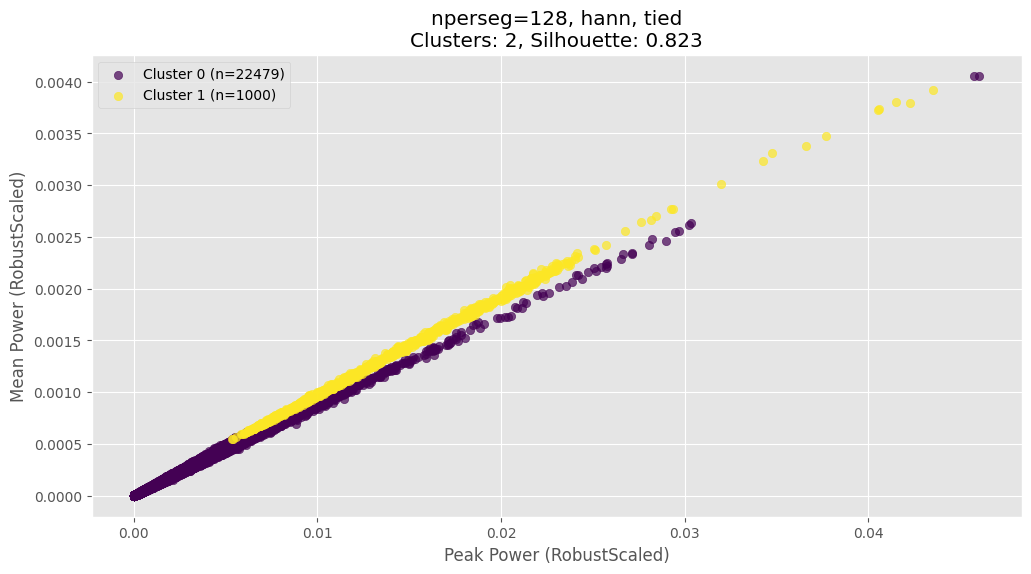

Processing combinations:   7%|▋         | 4/54 [02:49<33:48, 40.57s/it]

saved to clustering_results/20250428_191722_clusters_128_hann_tied_c2.csv


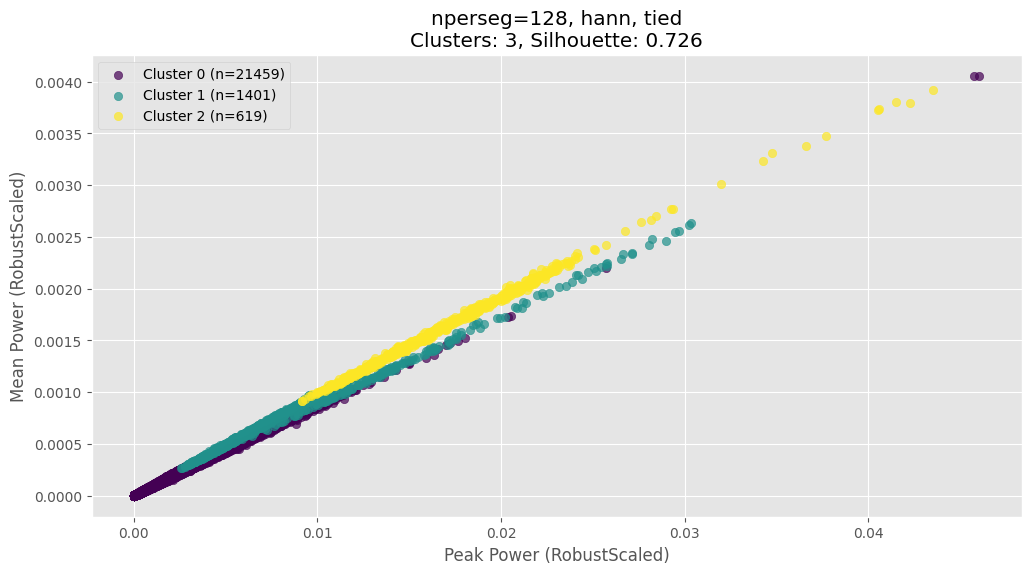

Processing combinations:   9%|▉         | 5/54 [03:24<31:25, 38.47s/it]

saved to clustering_results/20250428_191757_clusters_128_hann_tied_c3.csv


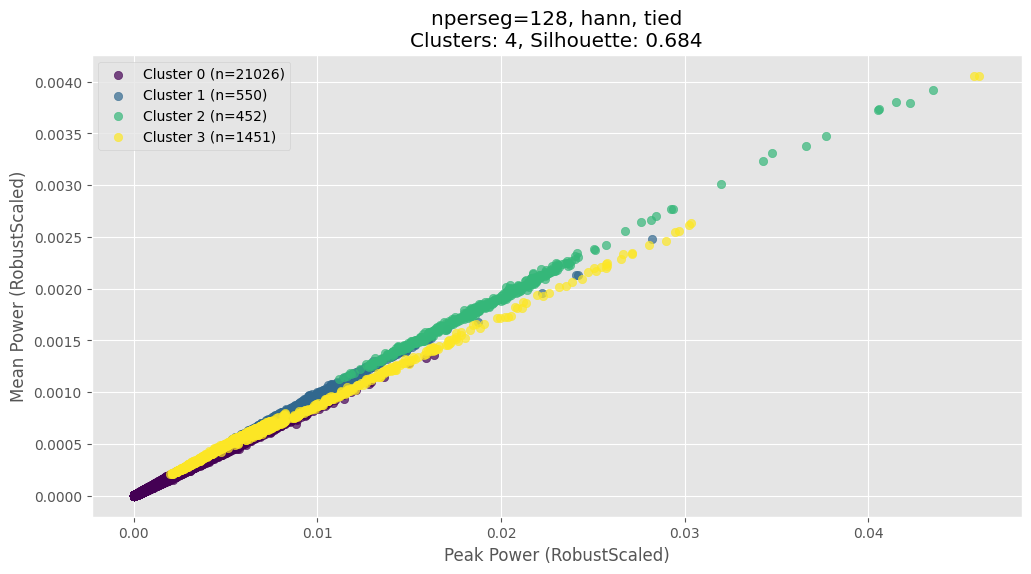

Processing combinations:  11%|█         | 6/54 [03:59<29:55, 37.41s/it]

saved to clustering_results/20250428_191832_clusters_128_hann_tied_c4.csv


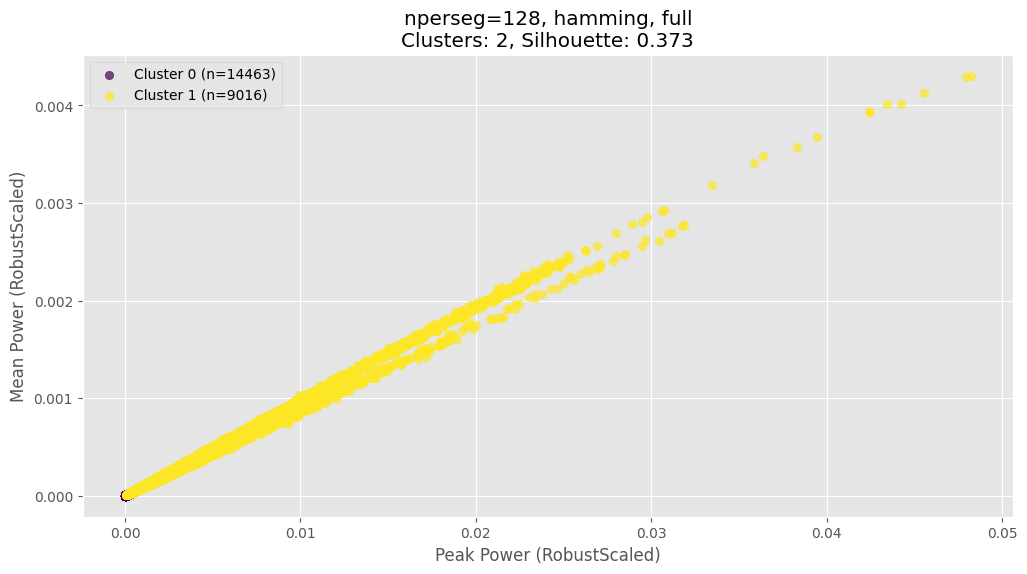

Processing combinations:  13%|█▎        | 7/54 [04:34<28:35, 36.50s/it]

saved to clustering_results/20250428_191907_clusters_128_hamming_full_c2.csv


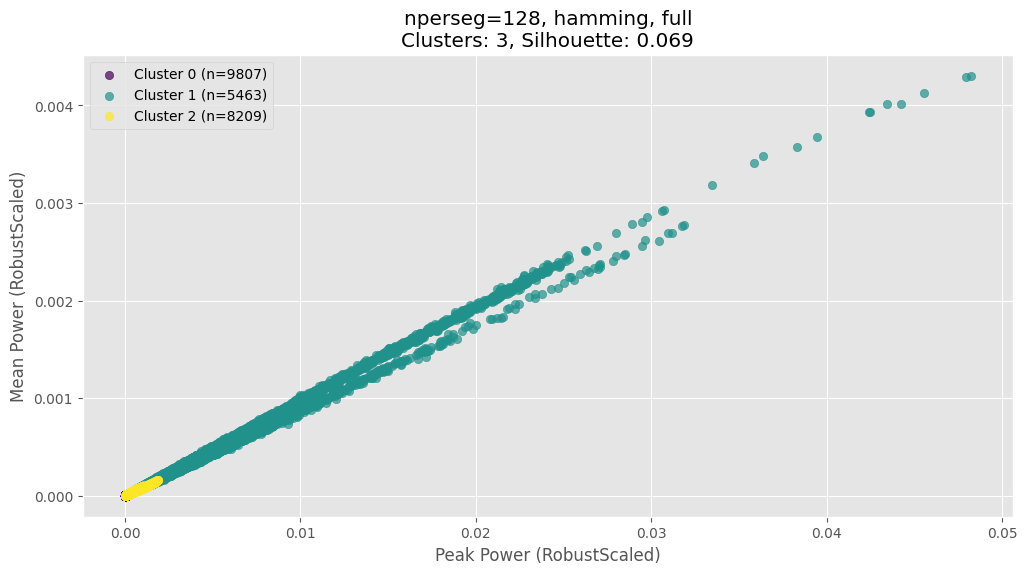

Processing combinations:  15%|█▍        | 8/54 [05:13<28:40, 37.39s/it]

saved to clustering_results/20250428_191946_clusters_128_hamming_full_c3.csv


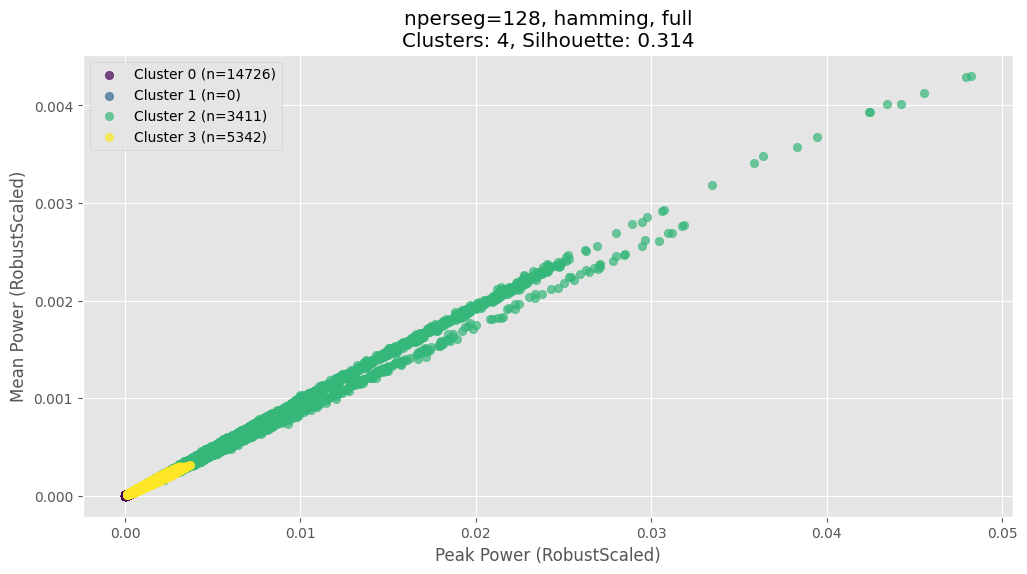

Processing combinations:  17%|█▋        | 9/54 [06:00<30:12, 40.28s/it]

saved to clustering_results/20250428_192032_clusters_128_hamming_full_c4.csv


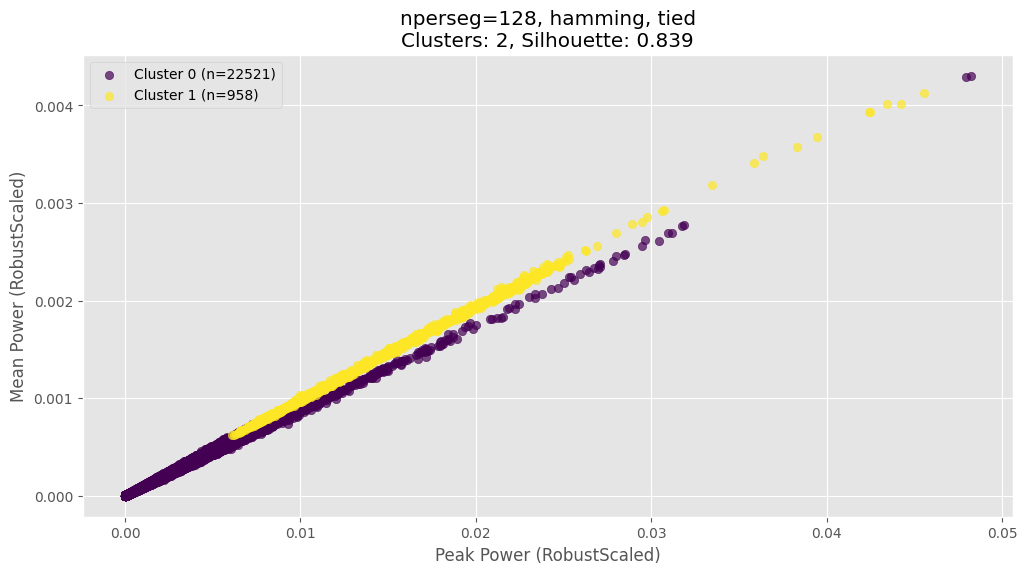

Processing combinations:  19%|█▊        | 10/54 [06:33<27:54, 38.06s/it]

saved to clustering_results/20250428_192106_clusters_128_hamming_tied_c2.csv


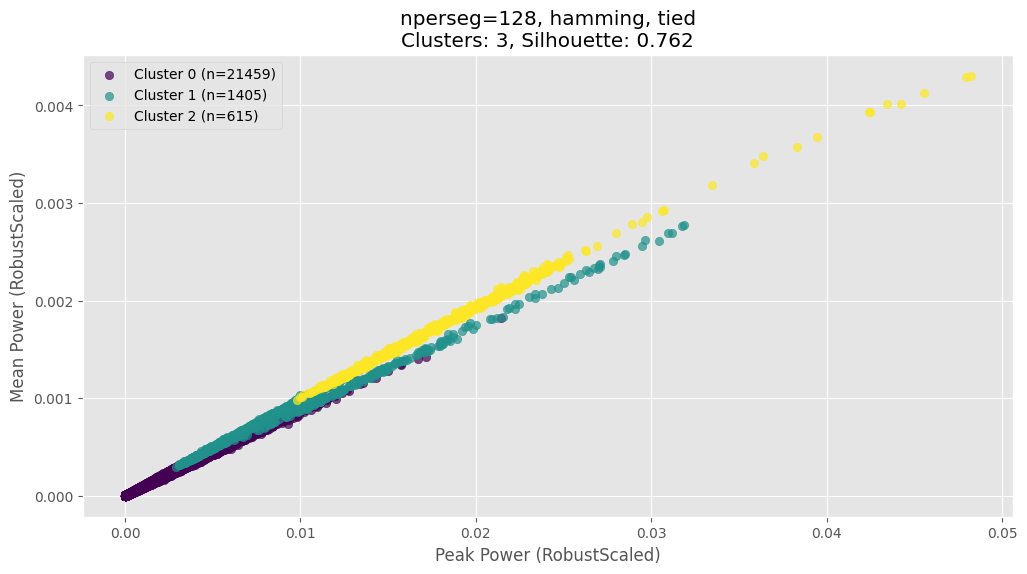

Processing combinations:  20%|██        | 11/54 [07:07<26:23, 36.82s/it]

saved to clustering_results/20250428_192140_clusters_128_hamming_tied_c3.csv


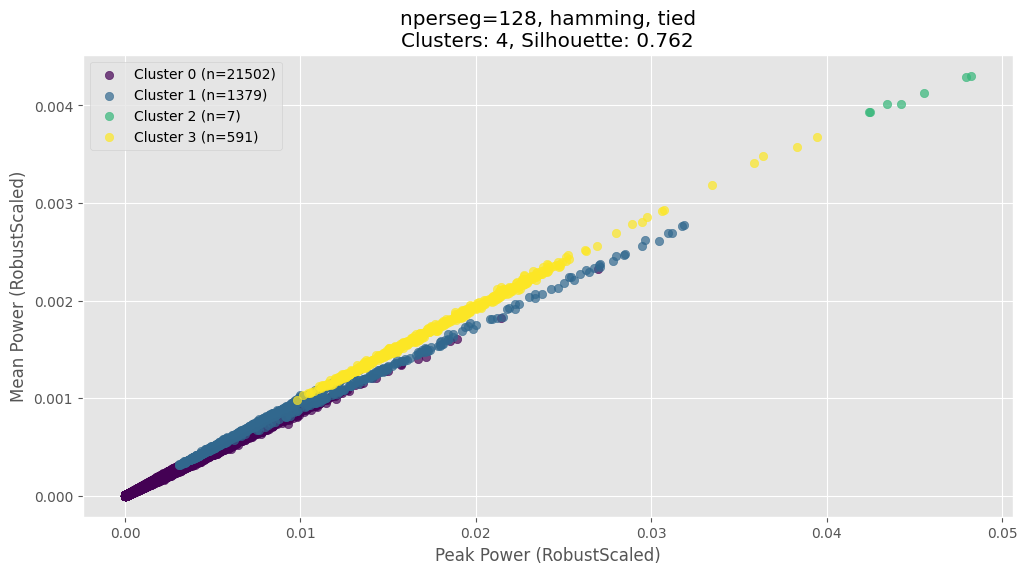

Processing combinations:  22%|██▏       | 12/54 [07:42<25:19, 36.18s/it]

saved to clustering_results/20250428_192214_clusters_128_hamming_tied_c4.csv


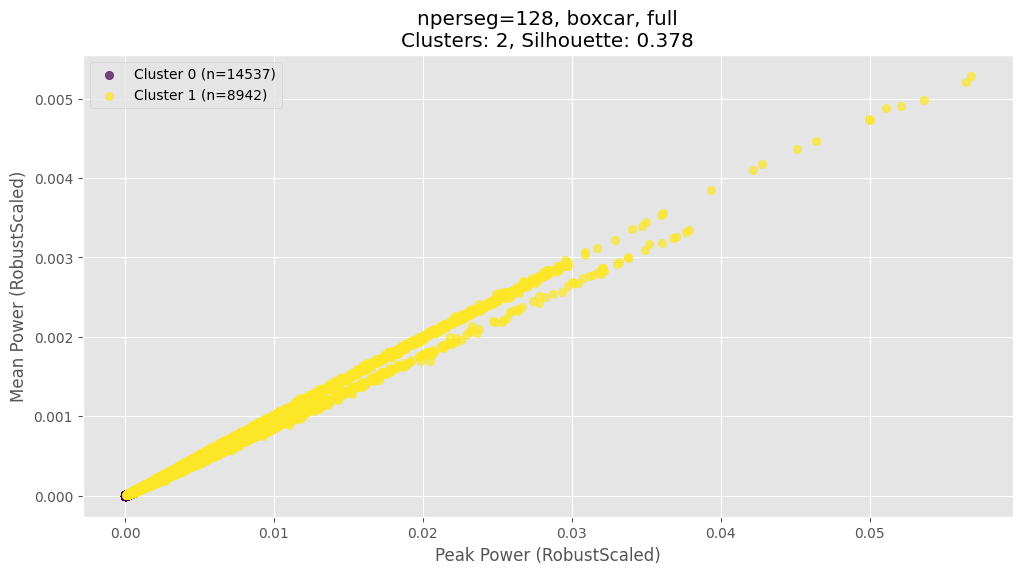

Processing combinations:  24%|██▍       | 13/54 [08:14<24:01, 35.16s/it]

saved to clustering_results/20250428_192247_clusters_128_boxcar_full_c2.csv


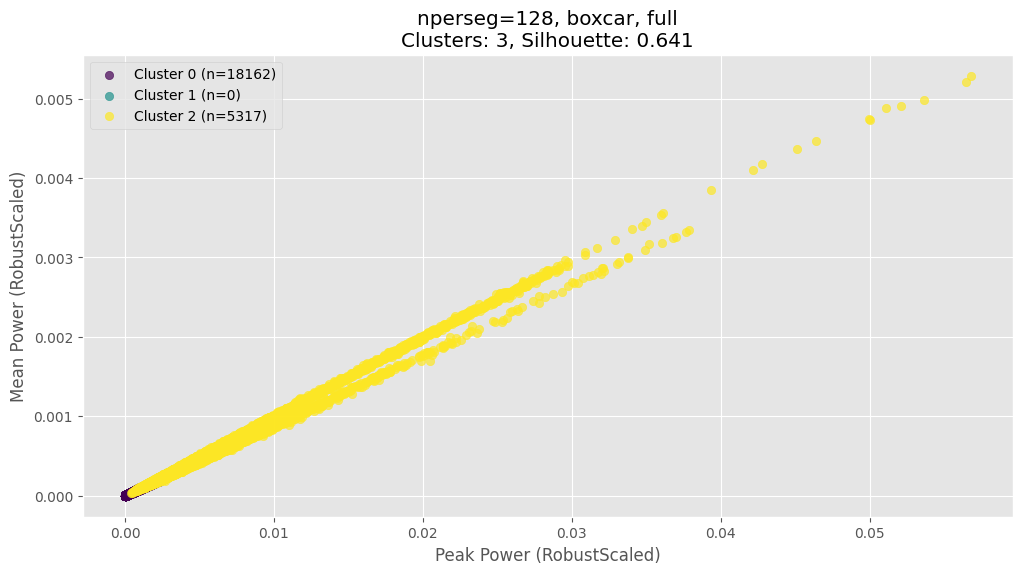

Processing combinations:  26%|██▌       | 14/54 [08:53<24:06, 36.16s/it]

saved to clustering_results/20250428_192326_clusters_128_boxcar_full_c3.csv


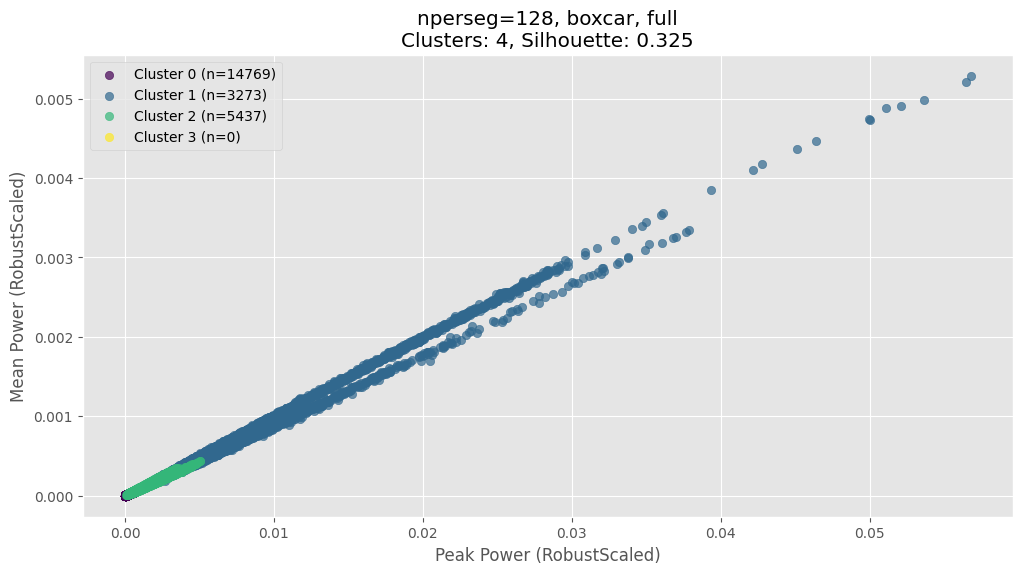

Processing combinations:  28%|██▊       | 15/54 [09:36<24:53, 38.29s/it]

saved to clustering_results/20250428_192409_clusters_128_boxcar_full_c4.csv


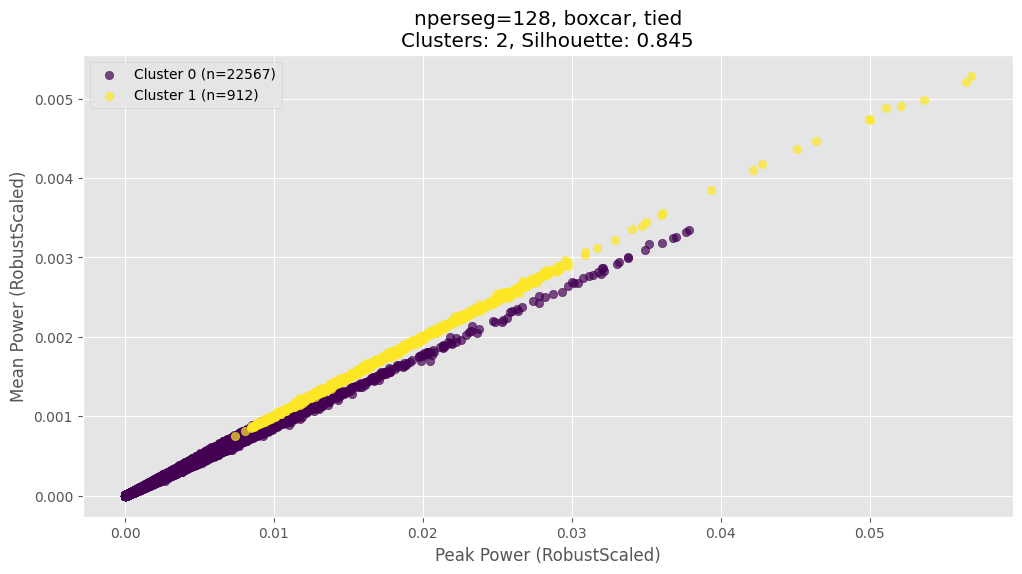

Processing combinations:  30%|██▉       | 16/54 [10:07<22:54, 36.18s/it]

saved to clustering_results/20250428_192440_clusters_128_boxcar_tied_c2.csv


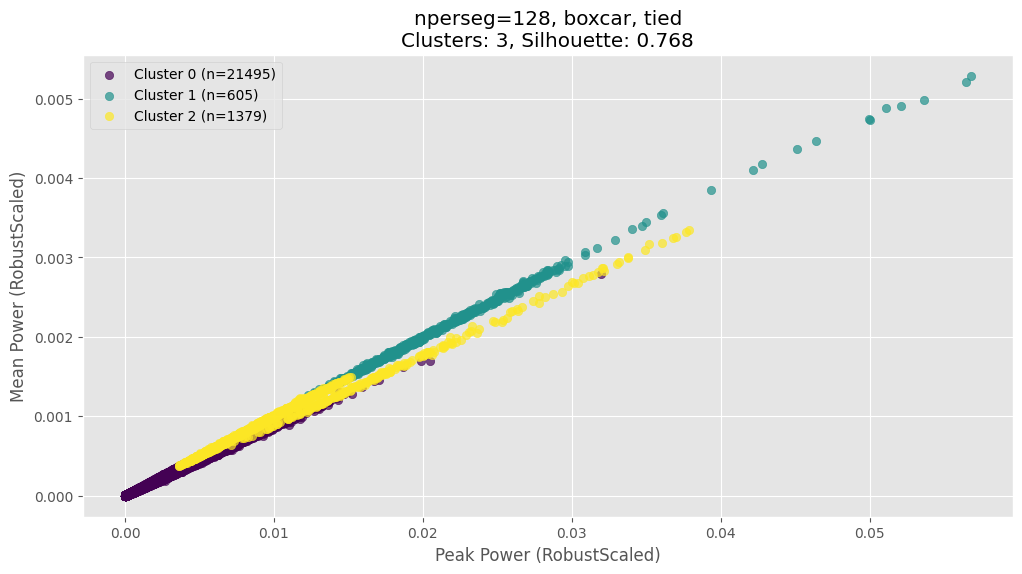

Processing combinations:  31%|███▏      | 17/54 [10:40<21:38, 35.09s/it]

saved to clustering_results/20250428_192513_clusters_128_boxcar_tied_c3.csv


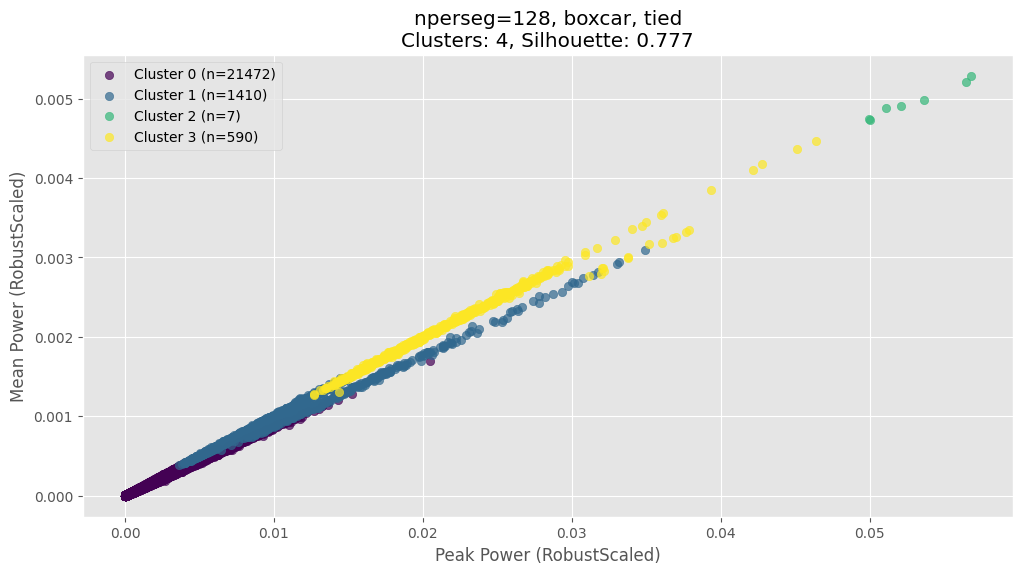

Processing combinations:  33%|███▎      | 18/54 [11:14<20:45, 34.61s/it]

saved to clustering_results/20250428_192546_clusters_128_boxcar_tied_c4.csv


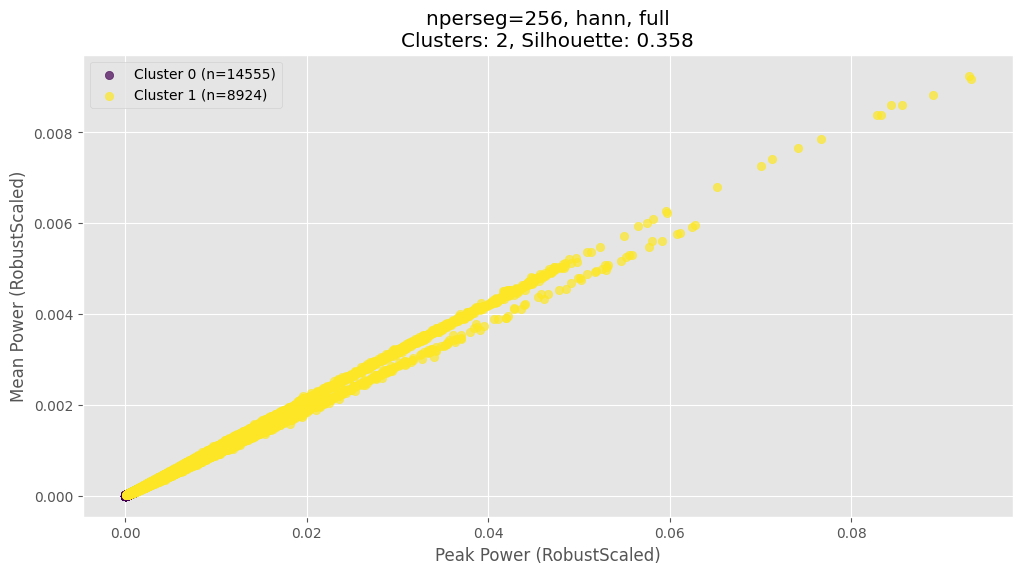

Processing combinations:  35%|███▌      | 19/54 [11:48<20:07, 34.51s/it]

saved to clustering_results/20250428_192621_clusters_256_hann_full_c2.csv


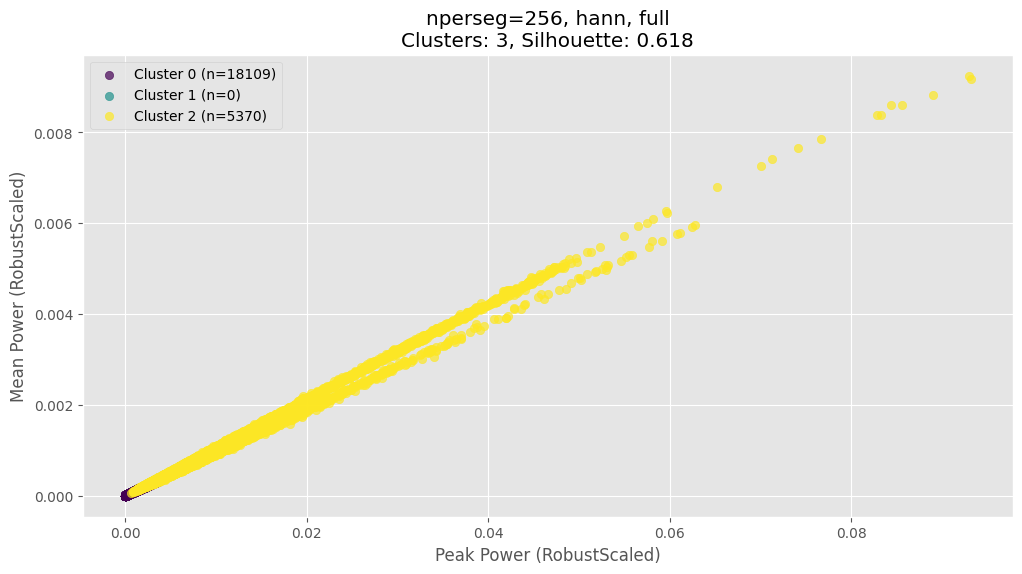

Processing combinations:  37%|███▋      | 20/54 [12:26<20:09, 35.58s/it]

saved to clustering_results/20250428_192659_clusters_256_hann_full_c3.csv


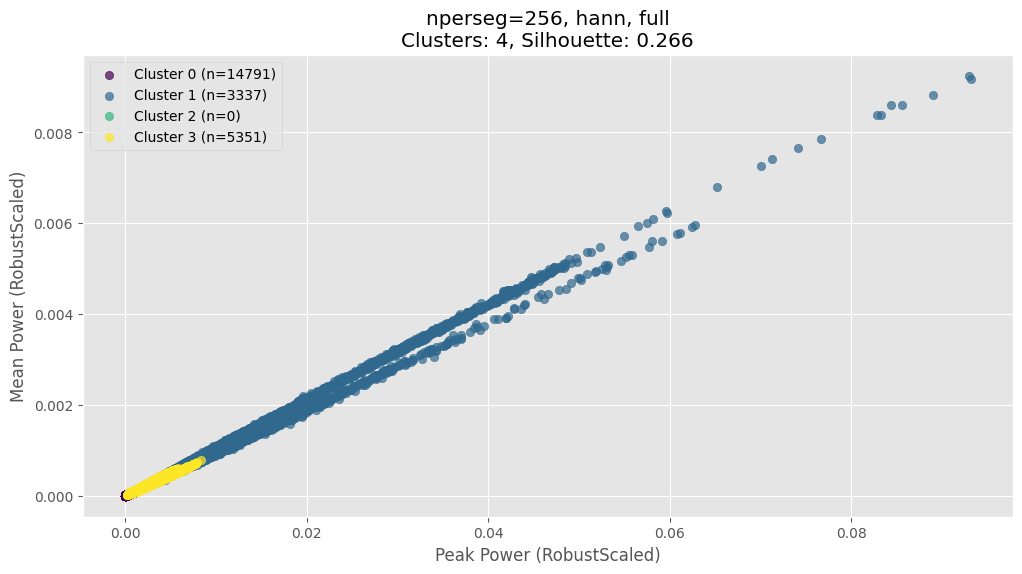

Processing combinations:  39%|███▉      | 21/54 [13:10<21:01, 38.23s/it]

saved to clustering_results/20250428_192743_clusters_256_hann_full_c4.csv


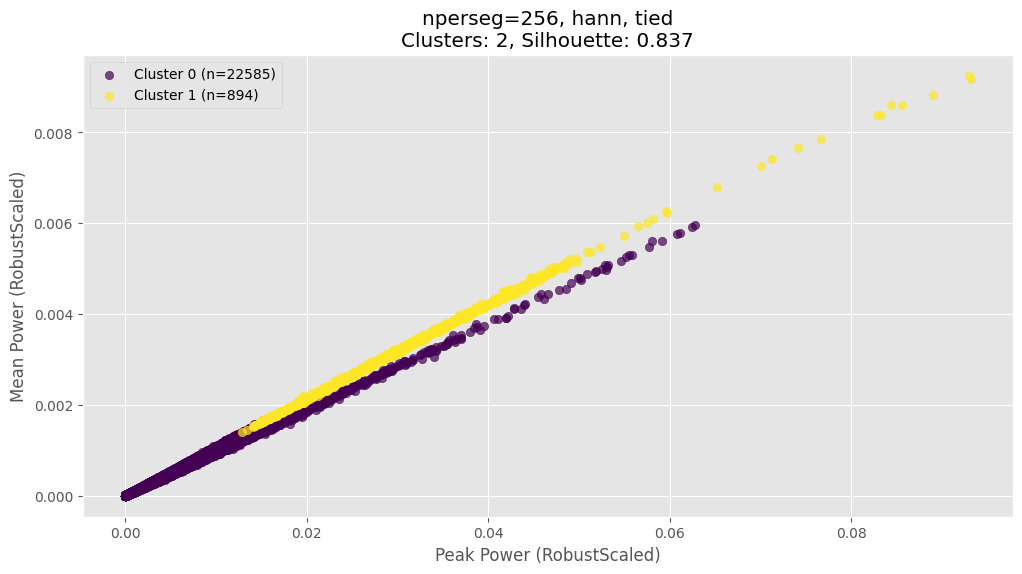

Processing combinations:  41%|████      | 22/54 [13:44<19:36, 36.77s/it]

saved to clustering_results/20250428_192816_clusters_256_hann_tied_c2.csv


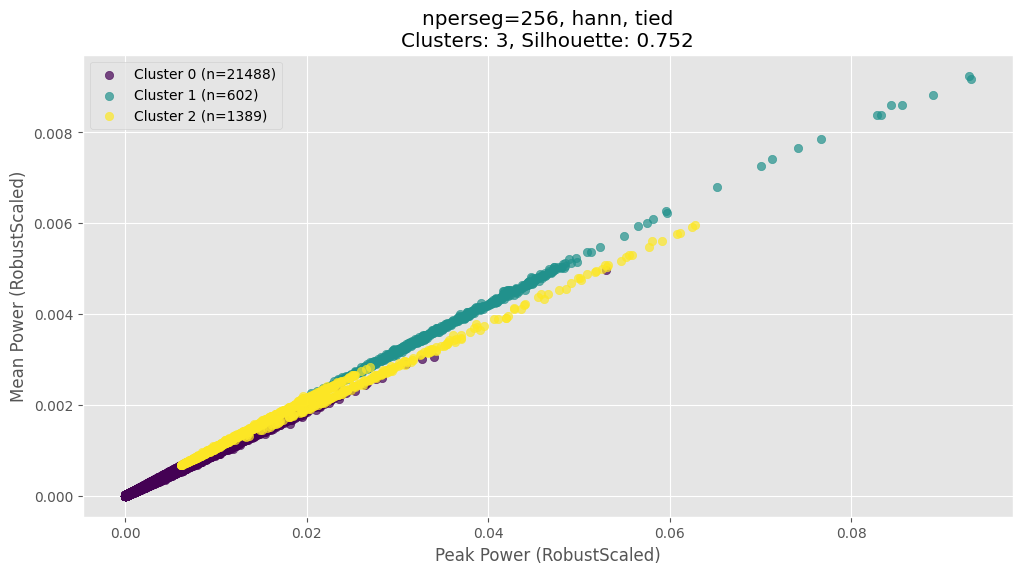

Processing combinations:  43%|████▎     | 23/54 [14:21<19:06, 37.00s/it]

saved to clustering_results/20250428_192854_clusters_256_hann_tied_c3.csv


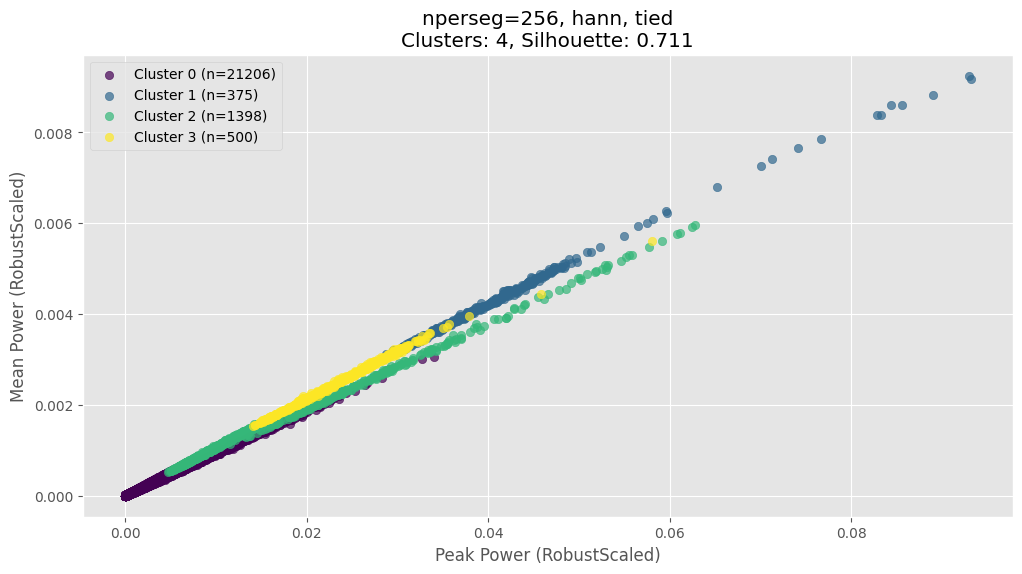

Processing combinations:  44%|████▍     | 24/54 [14:57<18:23, 36.77s/it]

saved to clustering_results/20250428_192930_clusters_256_hann_tied_c4.csv


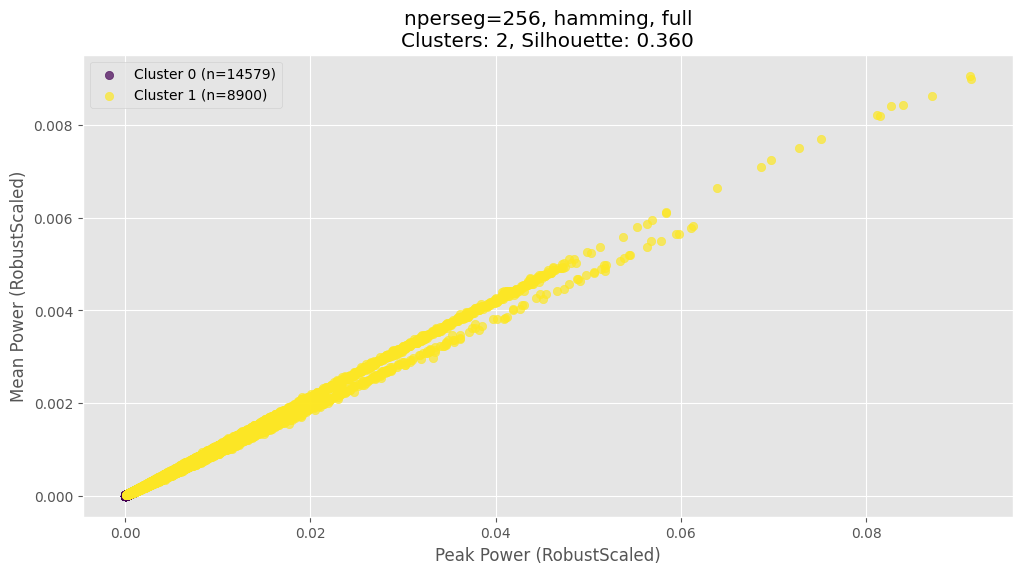

Processing combinations:  46%|████▋     | 25/54 [15:31<17:21, 35.91s/it]

saved to clustering_results/20250428_193004_clusters_256_hamming_full_c2.csv


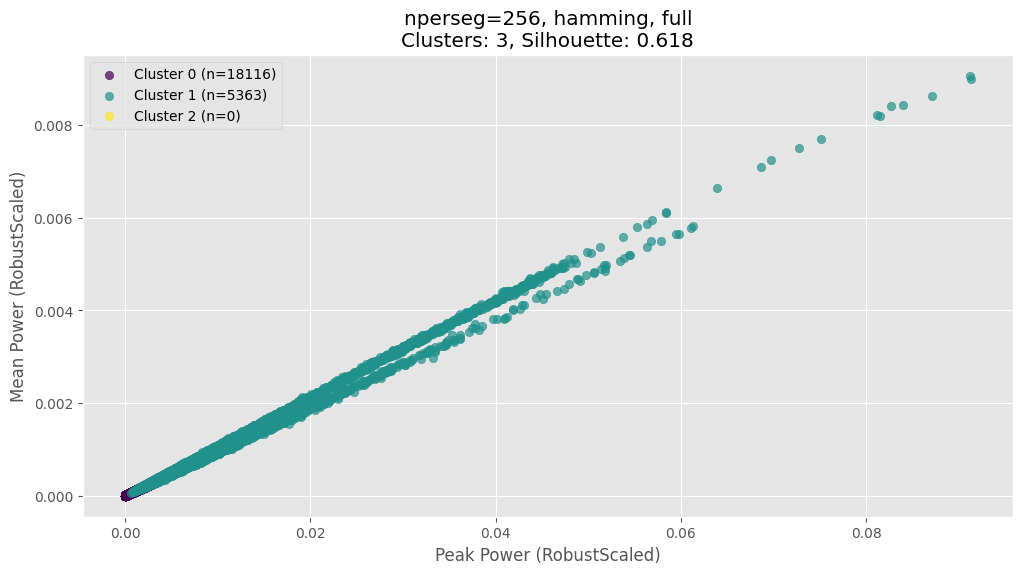

Processing combinations:  48%|████▊     | 26/54 [16:12<17:21, 37.19s/it]

saved to clustering_results/20250428_193044_clusters_256_hamming_full_c3.csv


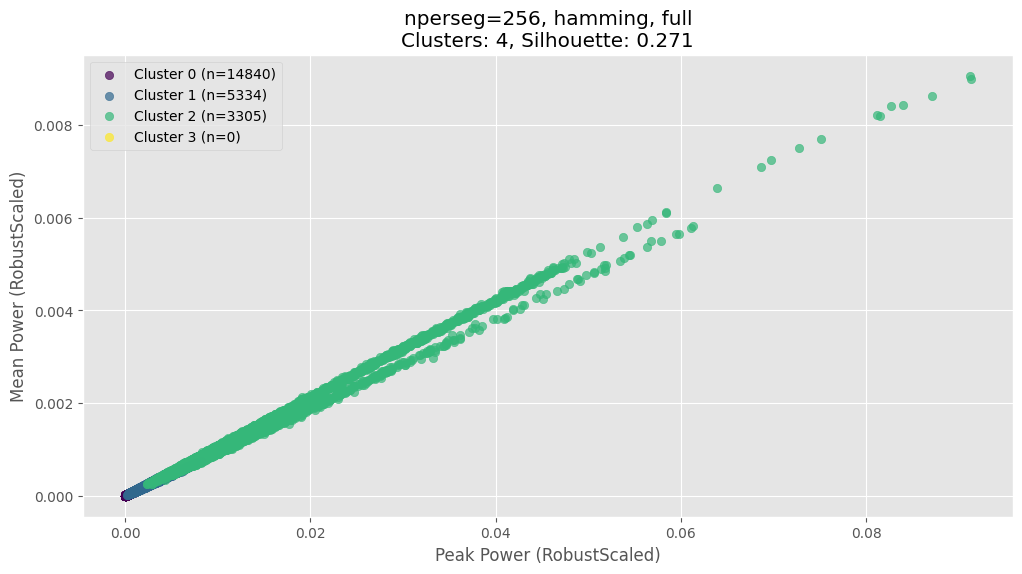

Processing combinations:  50%|█████     | 27/54 [16:55<17:34, 39.05s/it]

saved to clustering_results/20250428_193128_clusters_256_hamming_full_c4.csv


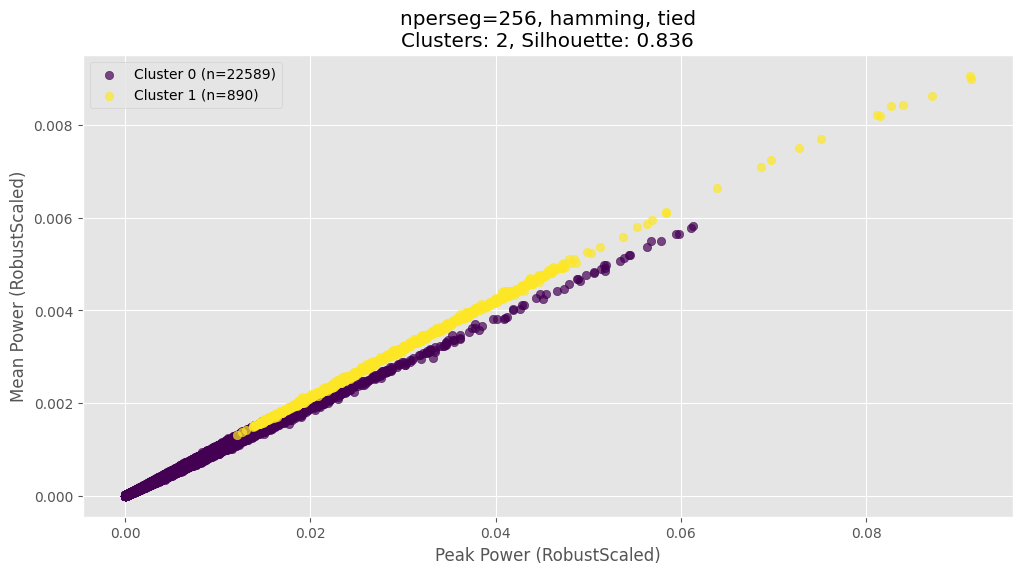

Processing combinations:  52%|█████▏    | 28/54 [17:28<16:09, 37.31s/it]

saved to clustering_results/20250428_193201_clusters_256_hamming_tied_c2.csv


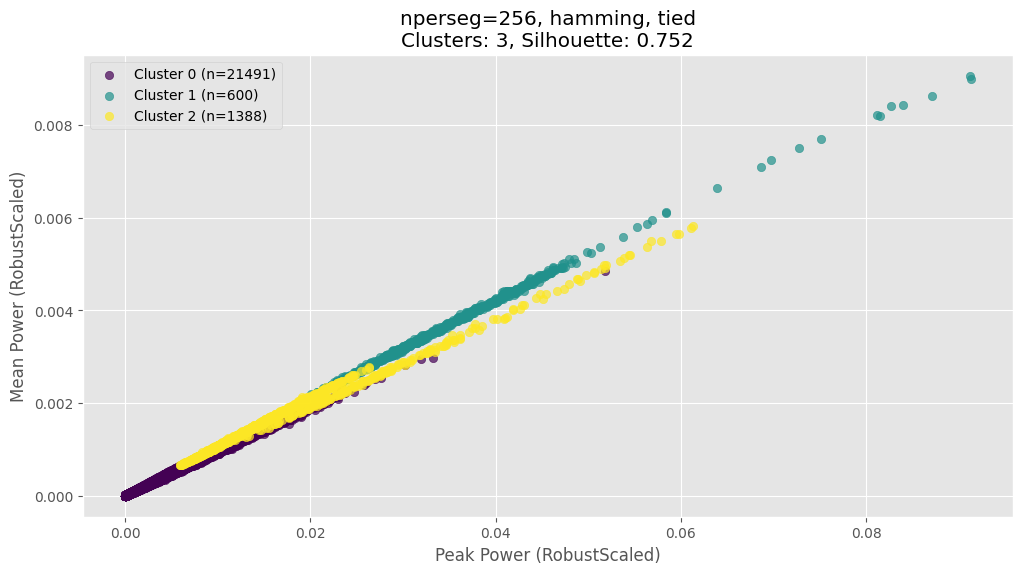

Processing combinations:  54%|█████▎    | 29/54 [18:02<15:08, 36.35s/it]

saved to clustering_results/20250428_193235_clusters_256_hamming_tied_c3.csv


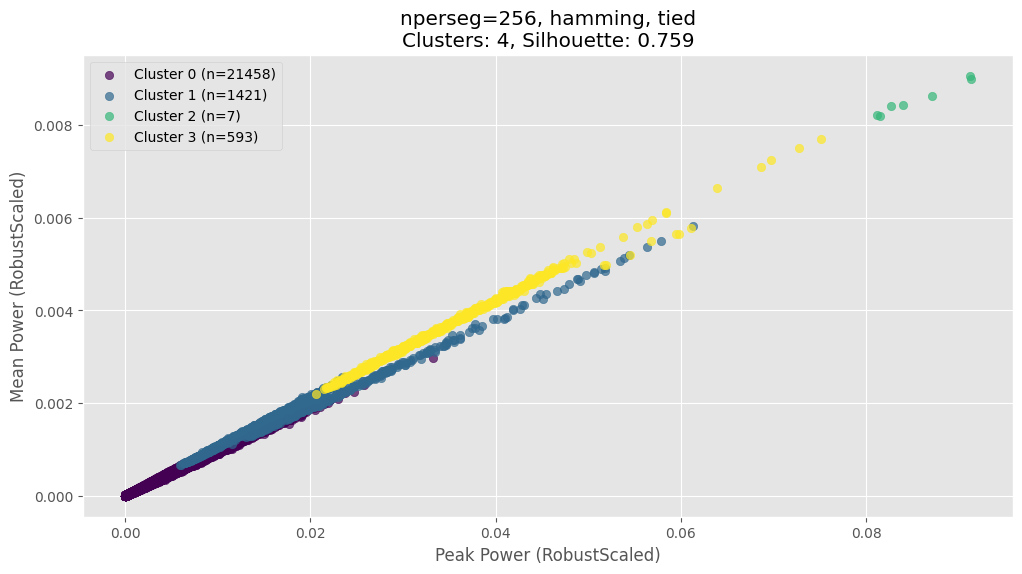

Processing combinations:  56%|█████▌    | 30/54 [18:39<14:33, 36.38s/it]

saved to clustering_results/20250428_193311_clusters_256_hamming_tied_c4.csv


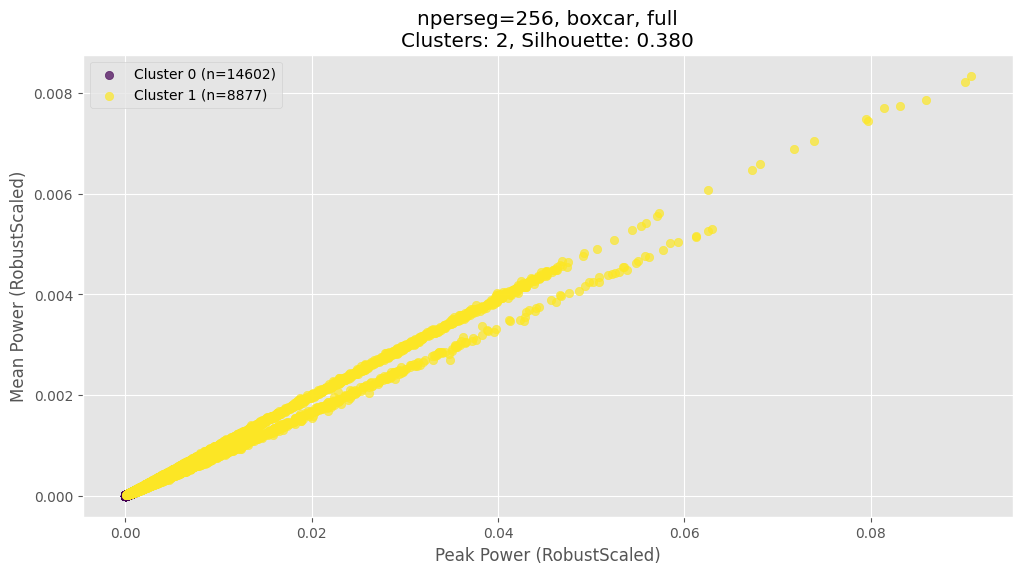

Processing combinations:  57%|█████▋    | 31/54 [19:12<13:32, 35.33s/it]

saved to clustering_results/20250428_193344_clusters_256_boxcar_full_c2.csv


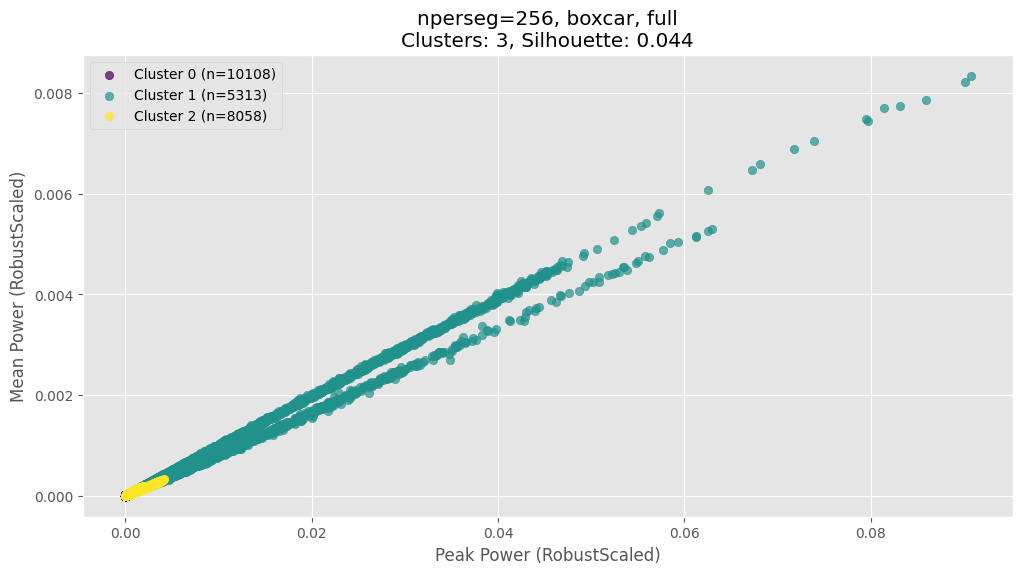

Processing combinations:  59%|█████▉    | 32/54 [19:49<13:10, 35.93s/it]

saved to clustering_results/20250428_193422_clusters_256_boxcar_full_c3.csv


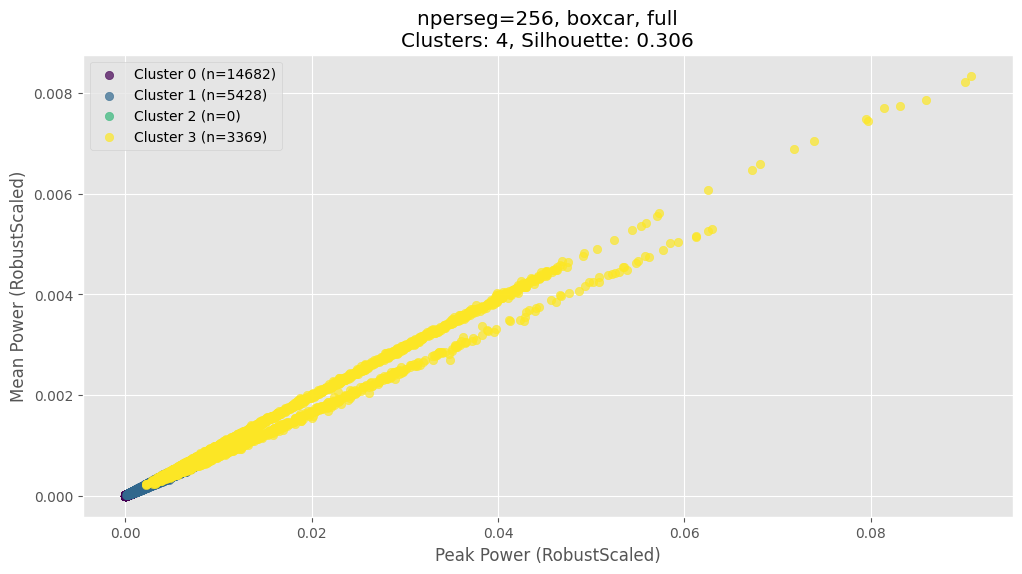

Processing combinations:  61%|██████    | 33/54 [20:35<13:35, 38.85s/it]

saved to clustering_results/20250428_193507_clusters_256_boxcar_full_c4.csv


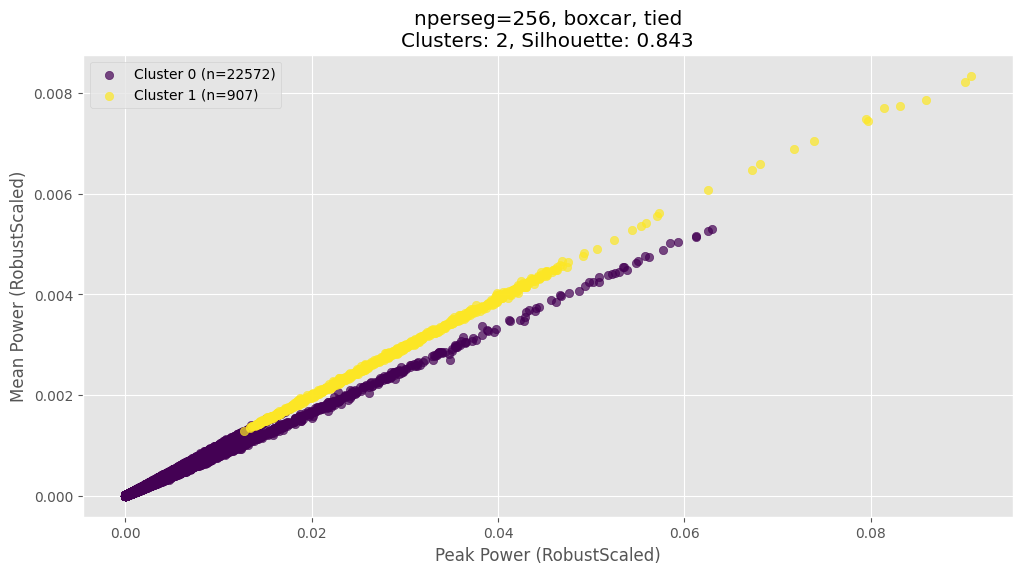

Processing combinations:  63%|██████▎   | 34/54 [21:07<12:19, 37.00s/it]

saved to clustering_results/20250428_193540_clusters_256_boxcar_tied_c2.csv


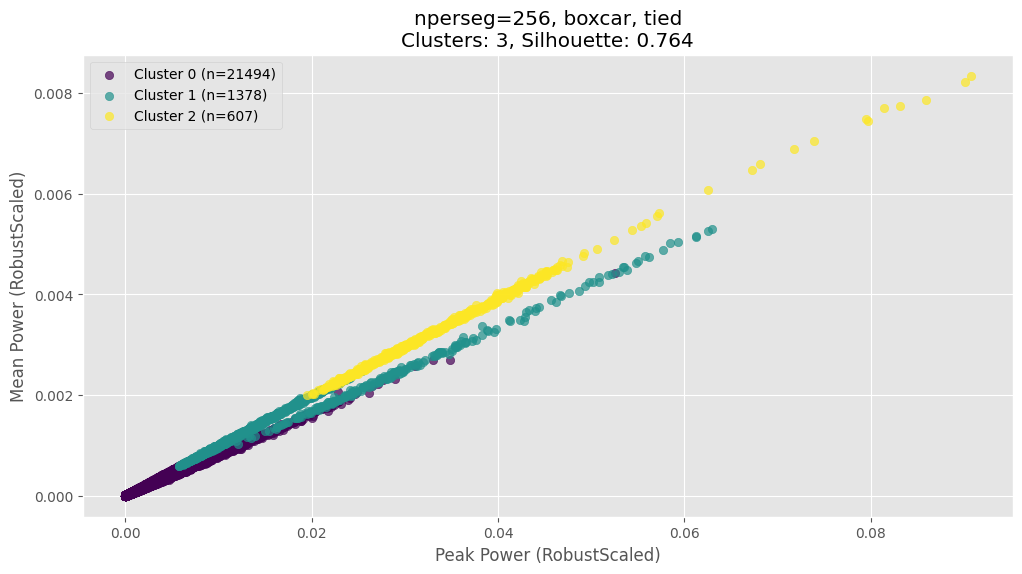

Processing combinations:  65%|██████▍   | 35/54 [21:40<11:19, 35.77s/it]

saved to clustering_results/20250428_193613_clusters_256_boxcar_tied_c3.csv


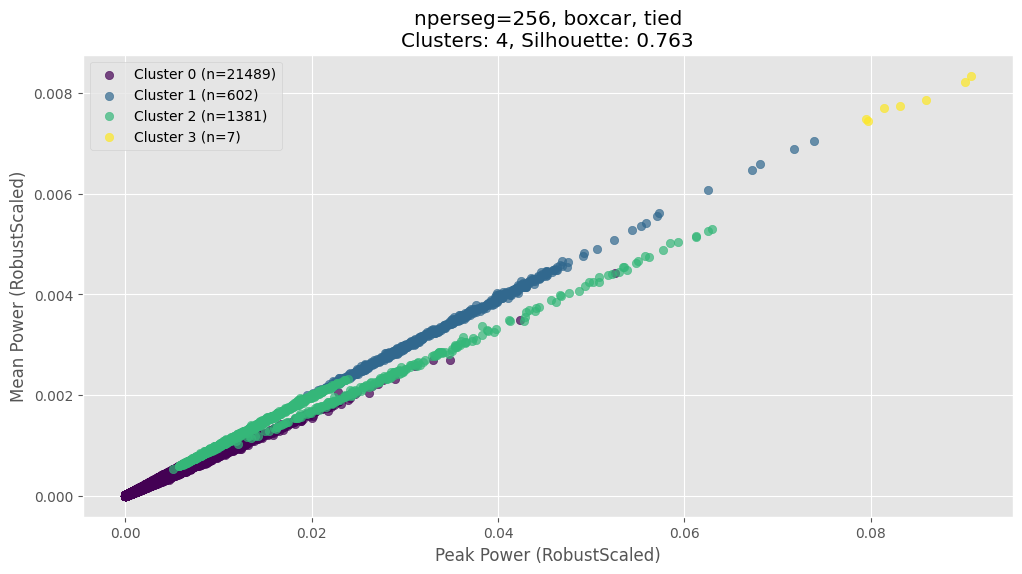

Processing combinations:  67%|██████▋   | 36/54 [22:15<10:36, 35.35s/it]

saved to clustering_results/20250428_193647_clusters_256_boxcar_tied_c4.csv


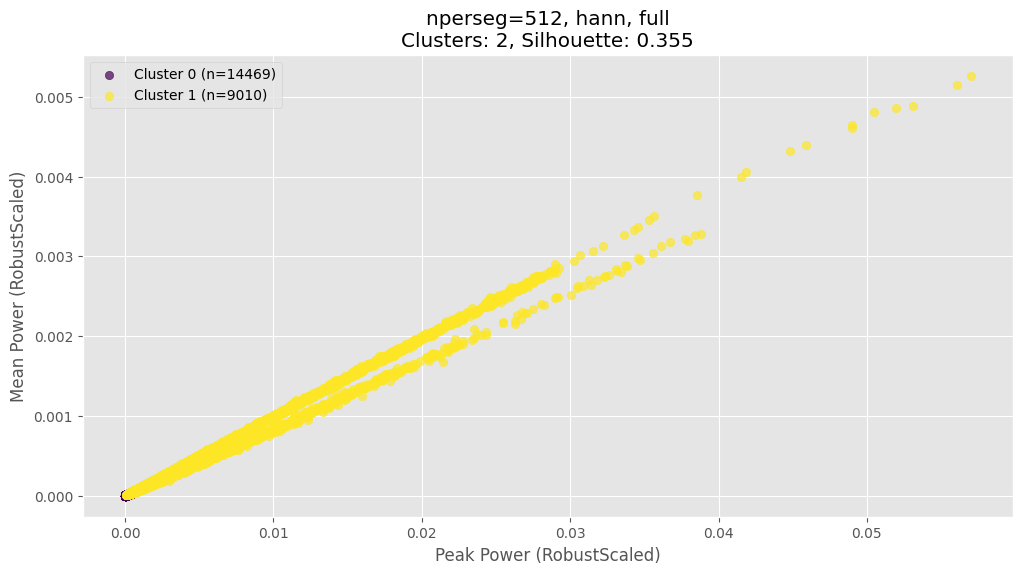

Processing combinations:  69%|██████▊   | 37/54 [22:50<10:00, 35.33s/it]

saved to clustering_results/20250428_193722_clusters_512_hann_full_c2.csv


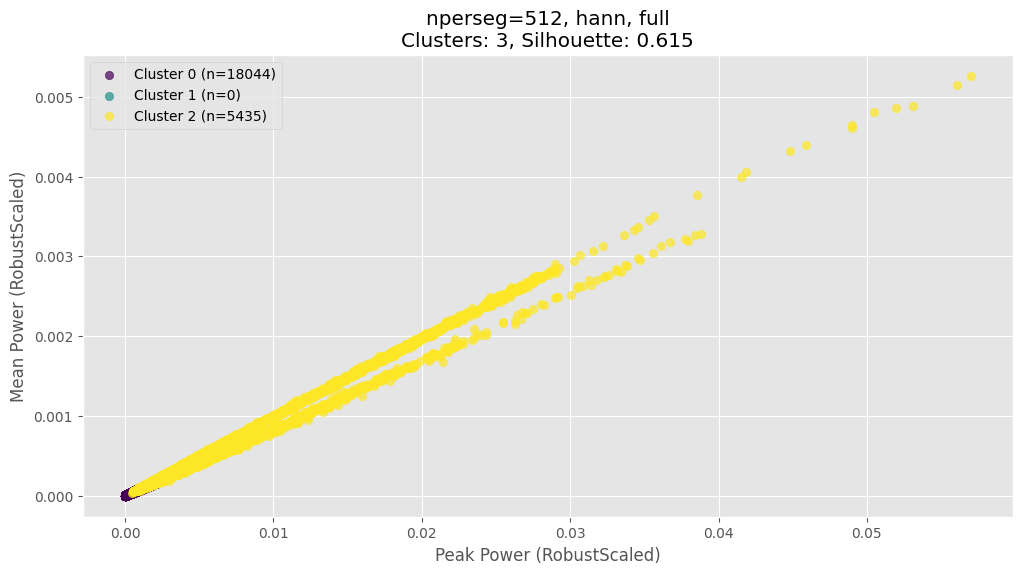

Processing combinations:  70%|███████   | 38/54 [23:31<09:51, 36.99s/it]

saved to clustering_results/20250428_193803_clusters_512_hann_full_c3.csv


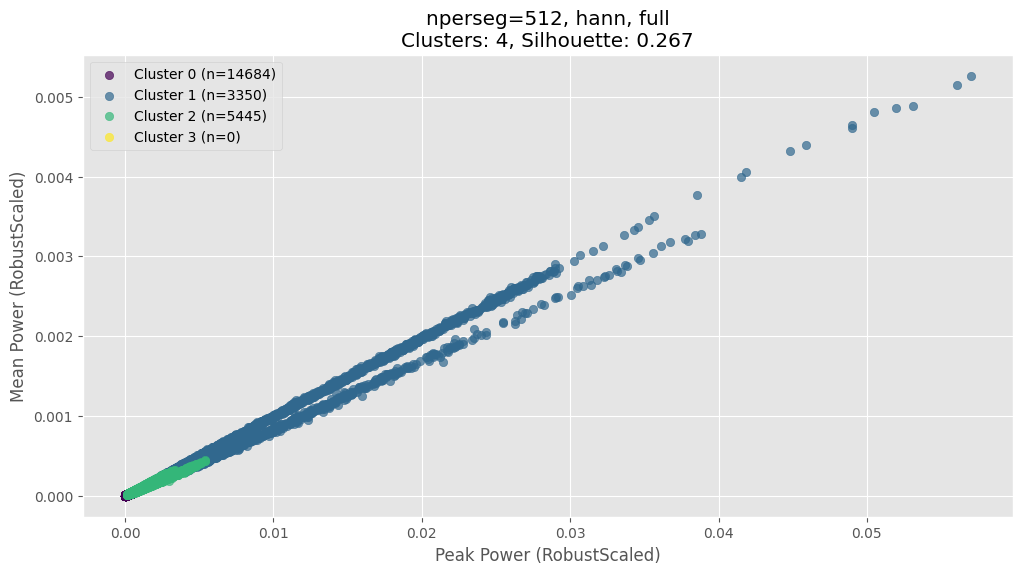

Processing combinations:  72%|███████▏  | 39/54 [24:15<09:46, 39.12s/it]

saved to clustering_results/20250428_193848_clusters_512_hann_full_c4.csv


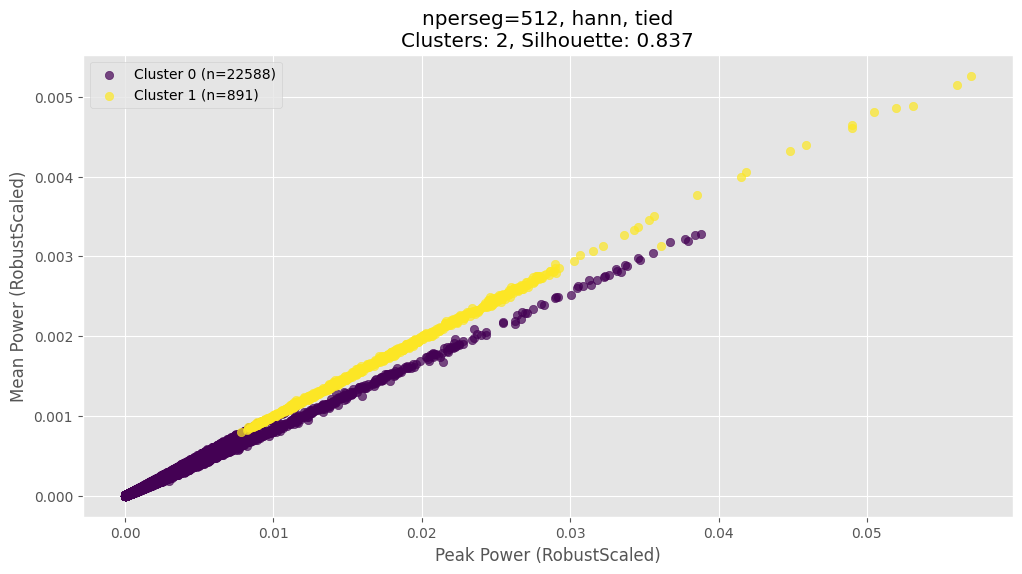

Processing combinations:  74%|███████▍  | 40/54 [24:48<08:42, 37.35s/it]

saved to clustering_results/20250428_193921_clusters_512_hann_tied_c2.csv


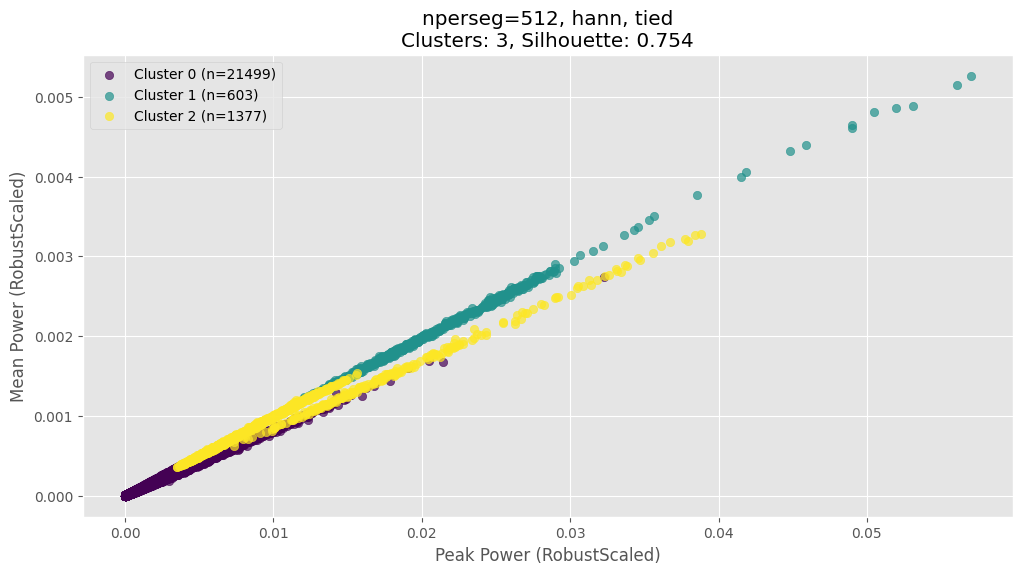

Processing combinations:  76%|███████▌  | 41/54 [25:23<07:56, 36.63s/it]

saved to clustering_results/20250428_193956_clusters_512_hann_tied_c3.csv


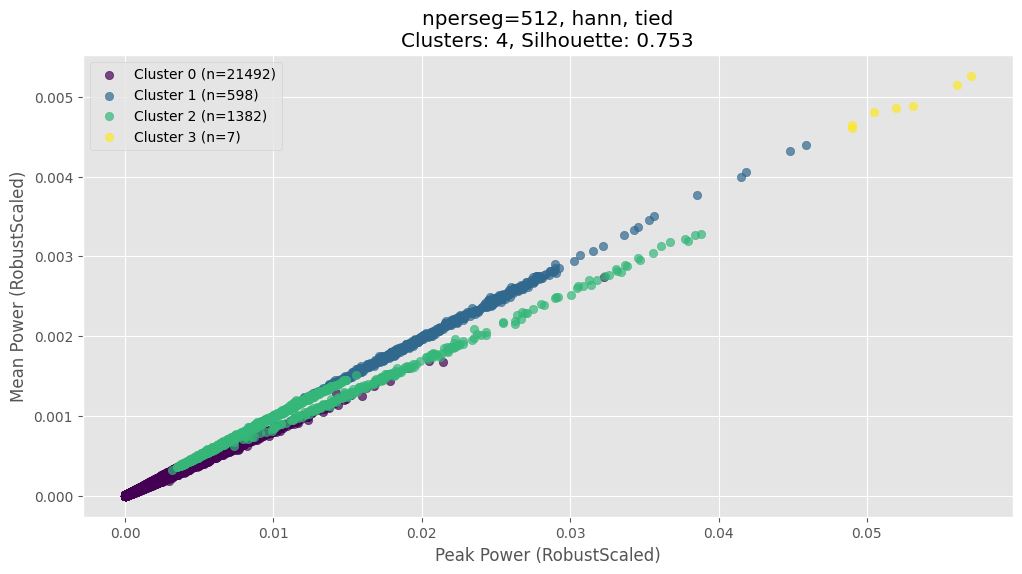

Processing combinations:  78%|███████▊  | 42/54 [25:58<07:15, 36.26s/it]

saved to clustering_results/20250428_194030_clusters_512_hann_tied_c4.csv


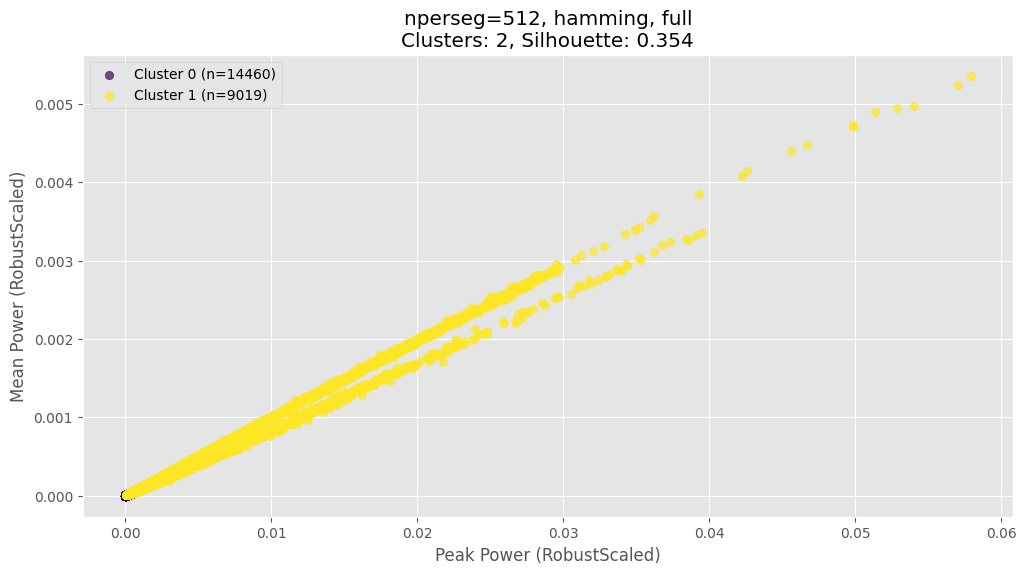

Processing combinations:  80%|███████▉  | 43/54 [26:34<06:36, 36.05s/it]

saved to clustering_results/20250428_194107_clusters_512_hamming_full_c2.csv


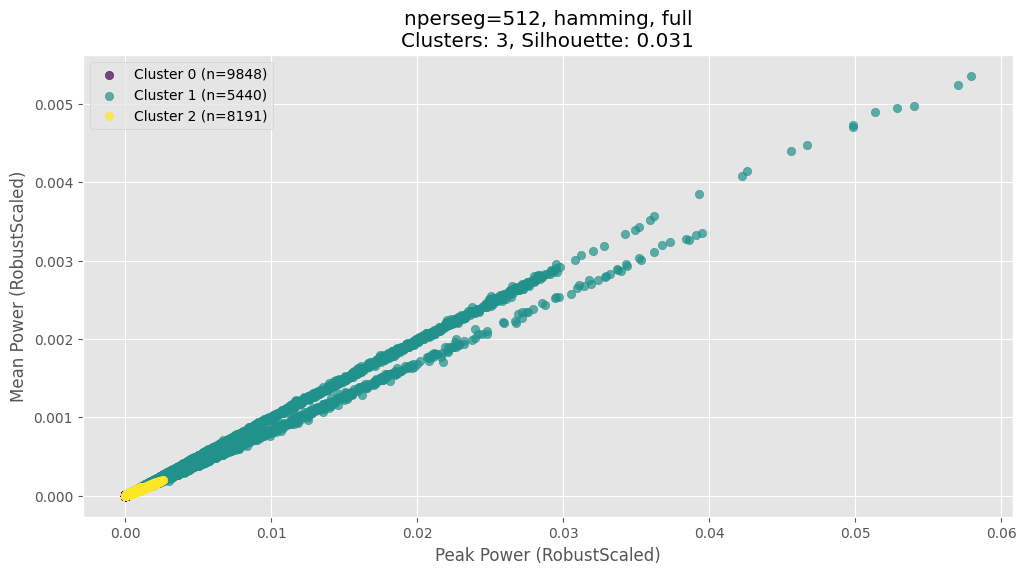

Processing combinations:  81%|████████▏ | 44/54 [27:19<06:28, 38.90s/it]

saved to clustering_results/20250428_194151_clusters_512_hamming_full_c3.csv


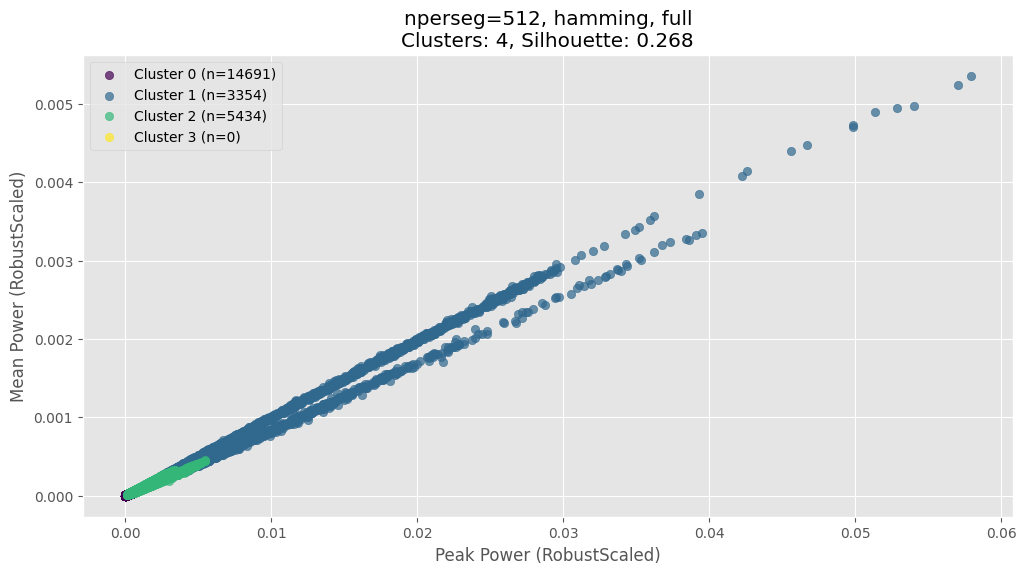

Processing combinations:  83%|████████▎ | 45/54 [28:04<06:06, 40.74s/it]

saved to clustering_results/20250428_194237_clusters_512_hamming_full_c4.csv


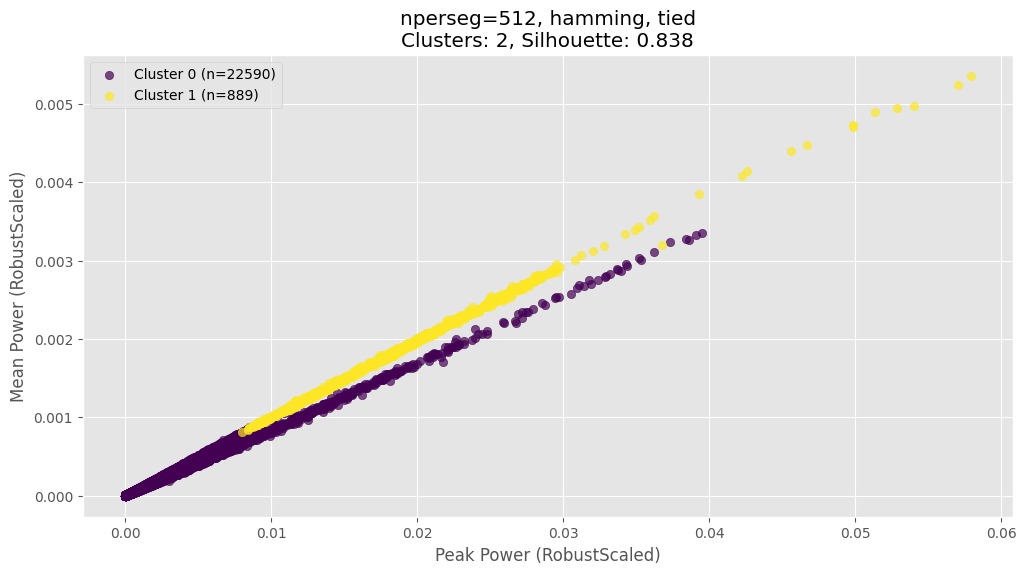

Processing combinations:  85%|████████▌ | 46/54 [28:38<05:09, 38.63s/it]

saved to clustering_results/20250428_194311_clusters_512_hamming_tied_c2.csv


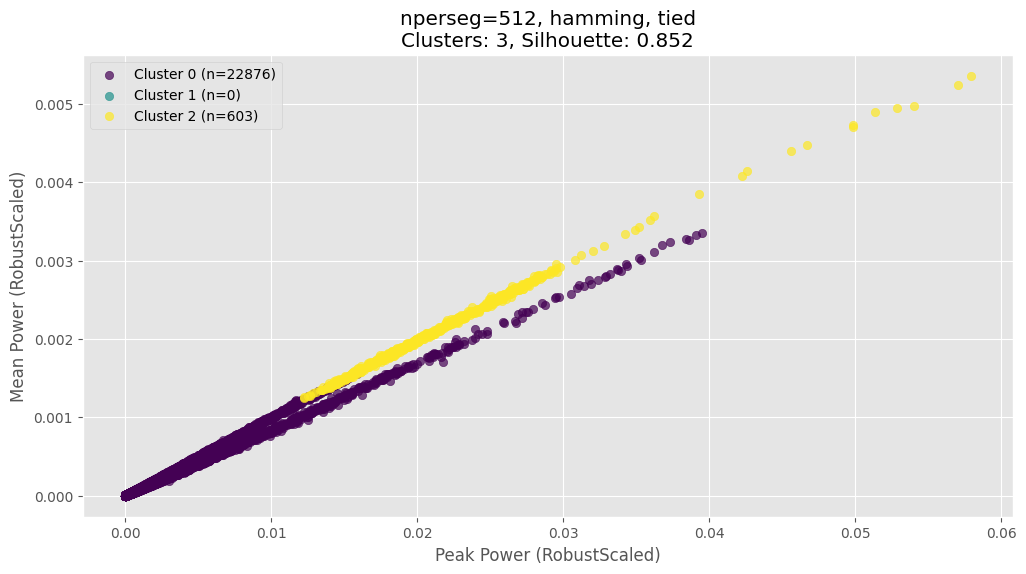

Processing combinations:  87%|████████▋ | 47/54 [29:24<04:45, 40.84s/it]

saved to clustering_results/20250428_194357_clusters_512_hamming_tied_c3.csv


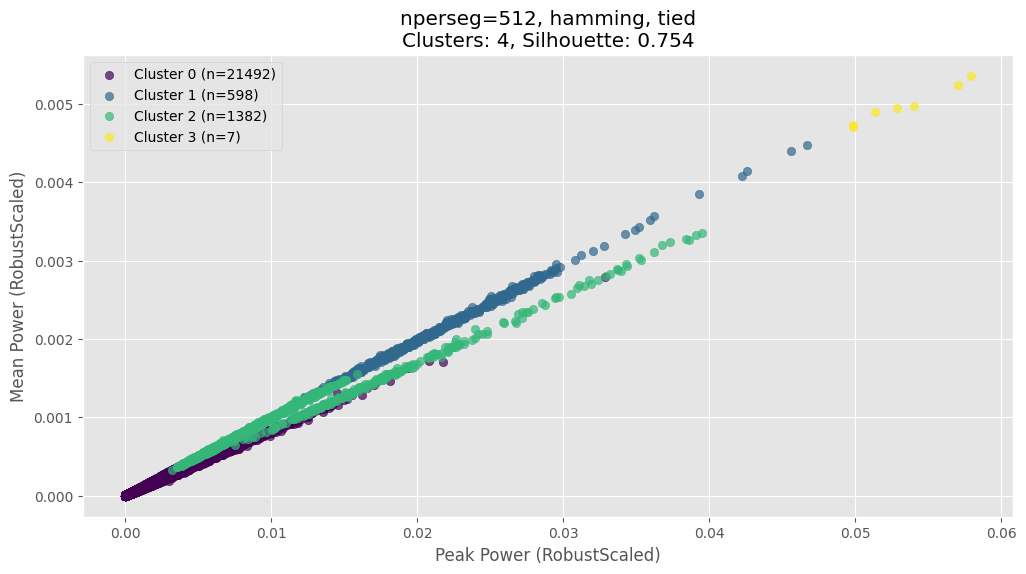

Processing combinations:  89%|████████▉ | 48/54 [29:59<03:54, 39.10s/it]

saved to clustering_results/20250428_194432_clusters_512_hamming_tied_c4.csv


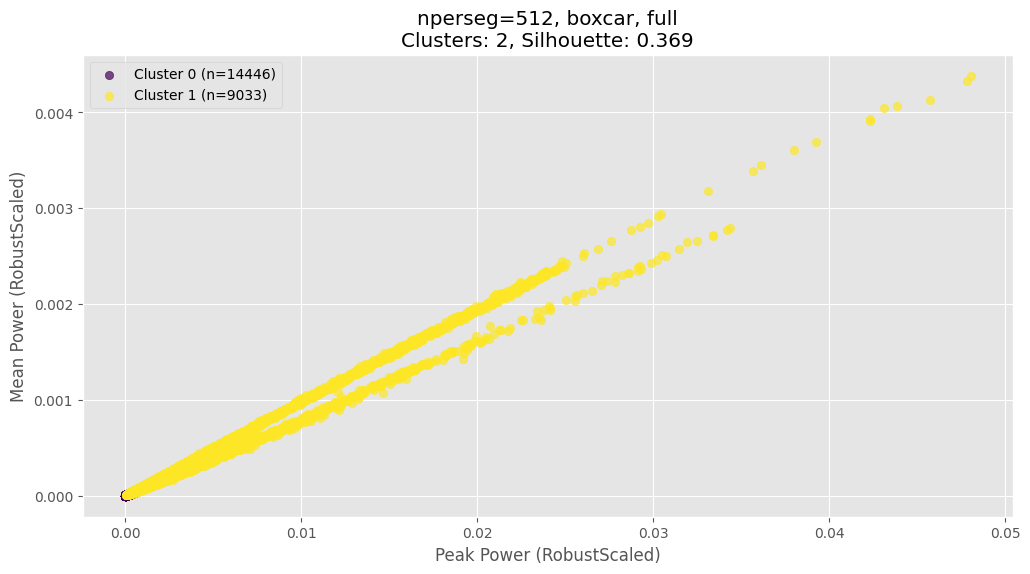

Processing combinations:  91%|█████████ | 49/54 [30:33<03:07, 37.56s/it]

saved to clustering_results/20250428_194506_clusters_512_boxcar_full_c2.csv


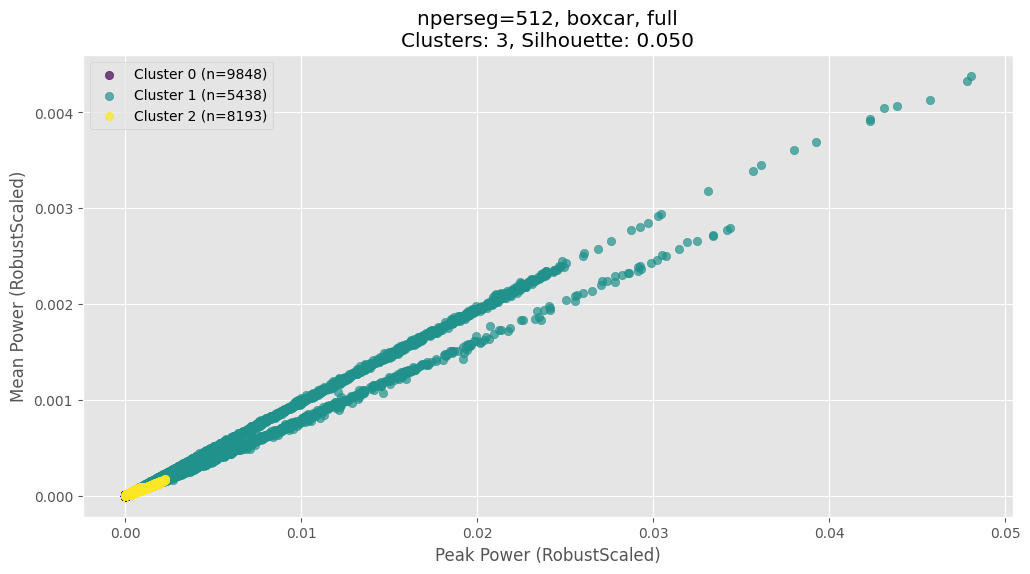

Processing combinations:  93%|█████████▎| 50/54 [31:15<02:34, 38.70s/it]

saved to clustering_results/20250428_194547_clusters_512_boxcar_full_c3.csv


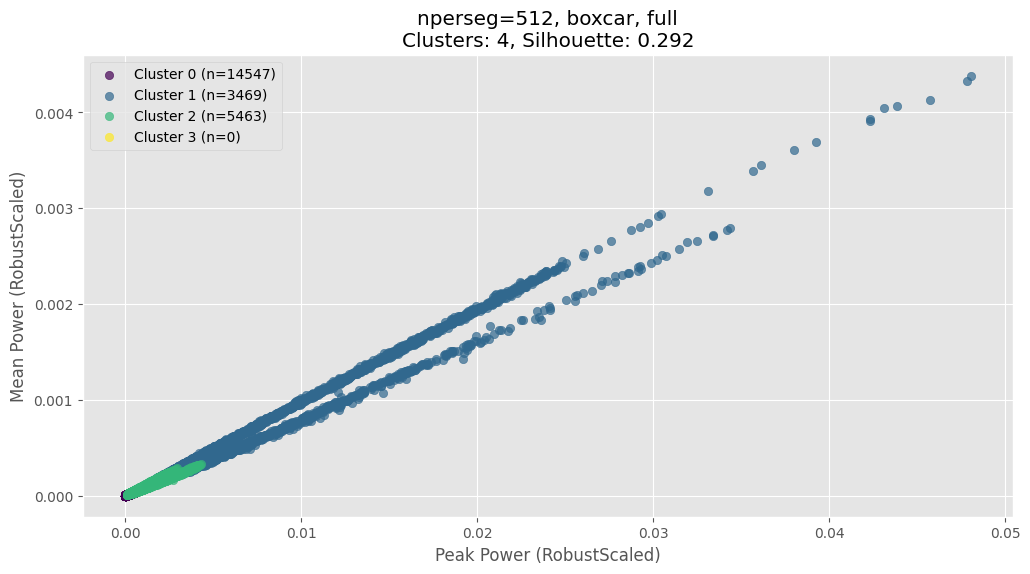

Processing combinations:  94%|█████████▍| 51/54 [32:03<02:04, 41.51s/it]

saved to clustering_results/20250428_194635_clusters_512_boxcar_full_c4.csv


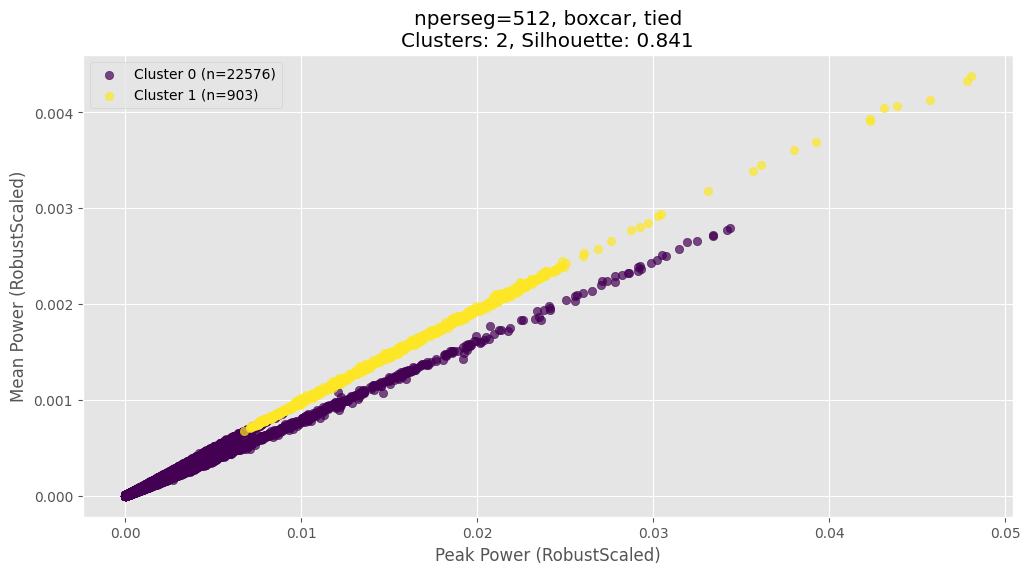

Processing combinations:  96%|█████████▋| 52/54 [32:35<01:17, 38.77s/it]

saved to clustering_results/20250428_194708_clusters_512_boxcar_tied_c2.csv


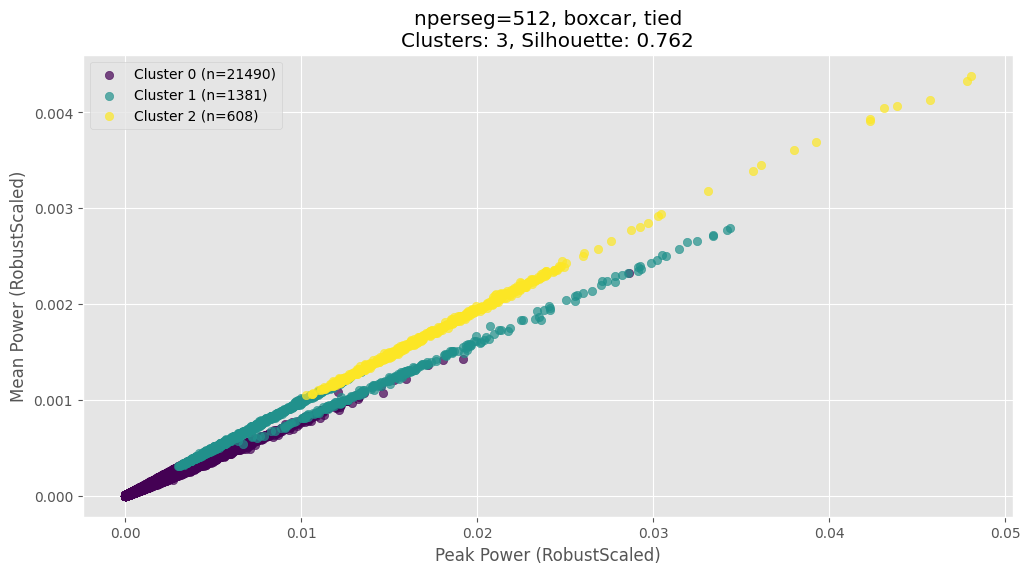

Processing combinations:  98%|█████████▊| 53/54 [33:09<00:37, 37.29s/it]

saved to clustering_results/20250428_194741_clusters_512_boxcar_tied_c3.csv


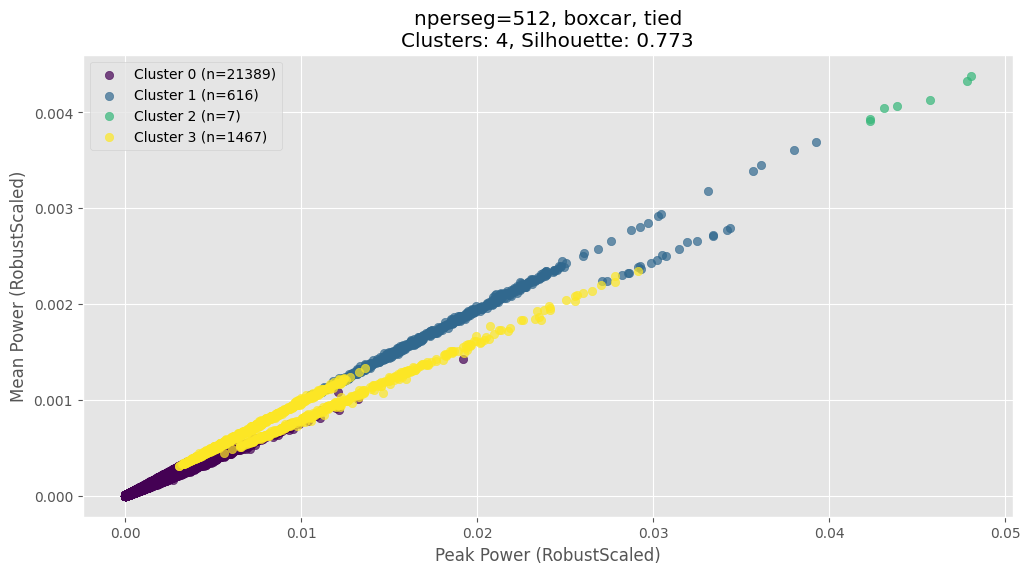

Processing combinations: 100%|██████████| 54/54 [33:44<00:00, 37.49s/it]

saved to clustering_results/20250428_194817_clusters_512_boxcar_tied_c4.csv

Лучший результат:
Silhouette: 0.852
Параметры: nperseg=512, window=hamming
Ковариация: tied, Кластеров: 3
Использовано признаков: 6


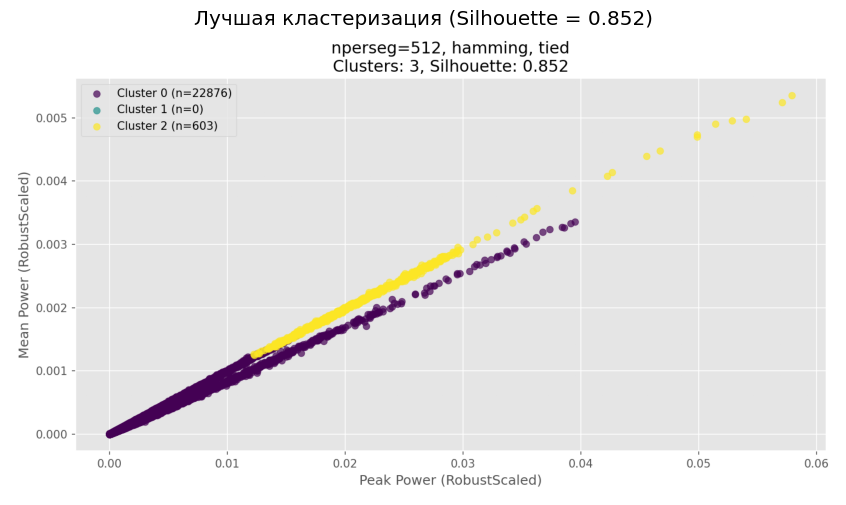


Топ-5 результатов:
    nperseg   window cov_type  n_clusters  silhouette
46      512  hamming     tied           3    0.851931
15      128   boxcar     tied           2    0.844760
33      256   boxcar     tied           2    0.842846
51      512   boxcar     tied           2    0.840992
9       128  hamming     tied           2    0.838888

Обработка завершена! Результаты сохранены в папке clustering_results


In [206]:
from scipy import signal, stats
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import os
from datetime import datetime
import warnings
from itertools import product

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
os.makedirs('clustering_results', exist_ok=True)

def load_data(path):
    df = pd.read_csv(path, sep=' ', header=None, skipinitialspace=True)
    return df.drop([0,1,2,3,504], axis=1).interpolate(axis=1)

df = load_data('Run200_Wave_0_1.txt')

# 2. Расширенные параметры для перебора (24 комбинации)
params = {
    'nperseg': [128, 256, 512],           # 3 варианта
    'window': ['hann', 'hamming', 'boxcar'], # 3 варианта
    'cov_type': ['full', 'tied'],          # 2 варианта
    'n_clusters': [2, 3, 4],               # 3 варианта
    'scaler': [RobustScaler()]             # Используем только RobustScaler
}

# 3. Улучшенное вычисление PSD характеристик
def get_psd_features(data, nperseg, window):
    features = []
    for row in data.values:
        _, psd = signal.welch(row, fs=1e9, nperseg=nperseg, window=window)
        features.append([
            psd.max(),                     # Пиковая мощность
            np.mean(psd),                  # Средняя мощность
            stats.entropy(psd),            # Энтропия
            np.sum(psd > np.mean(psd)/2),  # Ширина полосы
            np.median(psd),                # Медианная мощность
            np.std(psd)                    # Стандартное отклонение
        ])
    return np.array(features)

# 4. Основная функция обработки с улучшенной визуализацией
def process(params):
    try:
        # Вычисляем признаки
        X = get_psd_features(df, params['nperseg'], params['window'])

        # Масштабирование
        scaler = params['scaler']
        X_scaled = scaler.fit_transform(X)

        # Кластеризация
        gmm = GaussianMixture(
            n_components=params['n_clusters'],
            covariance_type=params['cov_type'],
            random_state=42,
            n_init=3
        )
        clusters = gmm.fit_predict(X_scaled)

        # Переназначаем кластеры
        if clusters[0] != 0:
            clusters = np.where(clusters == 0, -1, clusters)
            clusters = np.where(clusters == clusters[0], 0, clusters)
            clusters = np.where(clusters == -1, clusters[0], clusters)

        # Оценка качества
        sil_score = silhouette_score(X_scaled, clusters)

        # Визуализация для всех результатов
        plt.figure(figsize=(12, 6))
        colors = plt.cm.viridis(np.linspace(0, 1, params['n_clusters']))

        for i in range(params['n_clusters']):
            mask = clusters == i
            plt.scatter(X[mask,0], X[mask,1],
                       c=[colors[i]],
                       label=f'Cluster {i} (n={sum(mask)})',
                       alpha=0.7)

        plt.xlabel('Peak Power (RobustScaled)')
        plt.ylabel('Mean Power (RobustScaled)')
        plt.title(f"nperseg={params['nperseg']}, {params['window']}, {params['cov_type']}\n"
                 f"Clusters: {params['n_clusters']}, Silhouette: {sil_score:.3f}")
        plt.legend()
        plt.grid(True)

        # Сохраняем график
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        plot_path = f"clustering_results/plot_{params['nperseg']}_{params['window']}_\
{params['cov_type']}_c{params['n_clusters']}_{timestamp}.png"
        plt.savefig(plot_path, bbox_inches='tight', dpi=150)

        # Показываем график
        plt.show()
        plt.close()

        # Сохраняем кластеры
        cluster_path = f"clustering_results/{timestamp}_clusters_{params['nperseg']}_{params['window']}_\
{params['cov_type']}_c{params['n_clusters']}.csv"
        print(f'saved to {cluster_path}')

        result_df = pd.DataFrame({
            'index': df.index,
            'cluster': clusters,
        })
        result_df.to_csv(cluster_path, index=False)

        return {
            **params,
            'silhouette': sil_score,
            'plot_path': plot_path,
            'cluster_path': cluster_path,
            'features_used': X.shape[1]
        }

    except Exception as e:
        print(f"Ошибка для {params}: {str(e)}")
        return None

# 5. Запуск обработки всех комбинаций
print(f"Всего комбинаций параметров: {len(list(product(*params.values())))}")
results = []

# Обрабатываем каждую комбинацию
for combo in tqdm([dict(zip(params.keys(), vals)) for vals in product(*params.values())],
                 desc="Processing combinations"):
    res = process(combo)
    if res:
        results.append(res)

# 6. Анализ и сохранение результатов
if results:
    summary = pd.DataFrame(results)
    summary['scaler'] = 'RobustScaler'  # Добавляем информацию о scaler

    # Сохраняем полную сводку
    summary.to_csv('clustering_results/full_summary.csv', index=False)

    # Сохраняем топ-5 результатов
    top_results = summary.sort_values('silhouette', ascending=False).head(5)
    top_results.to_csv('clustering_results/top_results.csv', index=False)

    # Лучший результат
    best = summary.loc[summary['silhouette'].idxmax()]
    print("\nЛучший результат:")
    print(f"Silhouette: {best['silhouette']:.3f}")
    print(f"Параметры: nperseg={best['nperseg']}, window={best['window']}")
    print(f"Ковариация: {best['cov_type']}, Кластеров: {best['n_clusters']}")
    print(f"Использовано признаков: {best['features_used']}")

    # Визуализация лучшего результата
    if best['plot_path']:
        img = plt.imread(best['plot_path'])
        plt.figure(figsize=(12, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Лучшая кластеризация (Silhouette = {:.3f})".format(best['silhouette']))
        plt.show()
    else:
        print("График недоступен (низкий silhouette score)")

    print("\nТоп-5 результатов:")
    print(top_results[['nperseg', 'window', 'cov_type', 'n_clusters', 'silhouette']])
else:
    print("Не удалось получить результаты")

print("\nОбработка завершена! Результаты сохранены в папке clustering_results")

В целом лучше результаты не стали, а еще я пытался воспользоваться pyspark, но там были ошибки типов данных.



Общие выводы к решению и интерпретация полученных результатов:
Существуют три способа решения данной задачи: по главной компоненте (площадь под сигналом), по PSD(отношение площадей) и по тау-функции (паттерн уменьшения сигнала).
Мне удалось добиться более или менее понятного разделения по PSD. Жаль, что нижняя планка такая высокая, что я до нее не дотягиваю, хотя много что перепробовал, однако не помогло. Странно, что высокий siluette score не дает ничего, наверное, надо какой-то схемой контуры сигналов нарисовать и по контурам уже какую-то закономерность выделять(
